In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pmdarima as pm
from functools import reduce
import seaborn as sns

%run Thesis_Model_Function.ipynb

Run Complete: 15/07/2024 14:31:29


In [72]:
%run Thesis_Norway_Data_Prep.ipynb

Run Complete: 15/07/2024 14:31:30
Run Complete: 15/07/2024 14:31:34


## VARMAX Model Selection 

In [51]:
# Model Selection Needed
#  - No Exogenous variables pre COVID period - Best model 2 common, 5 regional, 3 AR, 2 MA 28th June
#  - With Exogenous variables pre-COVID period - Best Model 4 common, 2 regional, 2 AR, 3 MA 28th june

# Not neccessary
#  - No Exogenous variables COVID period - Best Model 2 common, 3 regional, 2 AR, 4 MA
#  - With Exogenous variables COVID period - Best Model 3 common, 3 regional, 2 AR, 2 MA
import numpy as np
import random

train_size = 60 #
regional_logmort_train = oslo_logmort_full.iloc[:, :train_size]
country_logmort_train = all_nor_logmort.iloc[:, :train_size]
num_iters = 100
common_limit = 5
regional_limit = 5
ar_limit = 5
ma_limit = 5

track_params = np.full((common_limit+1, regional_limit+1, ar_limit+1, ma_limit+1), 0)
error_store = np.full((common_limit+1, regional_limit+1, ar_limit+1, ma_limit+1), np.inf)

for i in range(num_iters):
    # Initialize random parameters
    common_terms = random.randint(1, common_limit)
    regional_terms = random.randint(1, regional_limit)
    ar = random.randint(1, ar_limit)
    ma = random.randint(1, ma_limit)
    
    # Generate new parameters if already used
    while track_params[common_terms, regional_terms, ar, ma] == 1:
        common_terms = random.randint(1, common_limit)
        regional_terms = random.randint(1, regional_limit)
        ar = random.randint(1, ar_limit)
        ma = random.randint(1, ma_limit)
    
    try:
        # Train the model
        track_params[common_terms, regional_terms, ar, ma] = 1
        _, _, _, _, _, _, _, _, _, _, model, _, test_errors,_,_ = VARMAX_model(
            country_logmort_train, regional_logmort_train, 
            common_terms=common_terms, regional_terms=regional_terms, 
            prediction_period=20, train_period=40, AR=ar+1, MA=ma+1,
            
#             exogenous_train=exog_train_oslo, exogenous_test=exog_test_oslo,
#             country_deaths=nor_death, country_pop=nor_pop, 
#             region_deaths=oslo_death, region_pop=oslo_pop,
            
#             exogenous_train=exog_train_oslo_select, exogenous_test=exog_test_oslo_select,
             country_deaths=nor_death_select, country_pop=nor_pop_select, 
             region_deaths=oslo_death_select, region_pop=oslo_pop_select,
            re_est=False)
        print(test_errors)
        # Store the mean of test_errors in the appropriate location
        error_store[common_terms, regional_terms, ar, ma] = np.mean(test_errors) 
    except Exception as e:
        print(f"Error in configuration: AR={ar+1}, MA={ma+1}, Common Terms={common_terms}, Regional Terms={regional_terms}. Error: {str(e)}")
        error_store[common_terms, regional_terms, ar, ma] = np.inf  # Set a large error value
                
    print(f"Configuration {i+1} processed: AR={ar+1}, MA={ma+1}, Common Terms={common_terms}, Regional Terms={regional_terms}, Error={error_store[common_terms, regional_terms, ar, ma]}")

    
    
    
print(np.where(error_store == np.min(error_store)))

[3.07469554 3.96858686 2.17642083 1.40784003 1.26252916 2.35732673
 2.50744032]
Configuration 1 processed: AR=4, MA=3, Common Terms=2, Regional Terms=4, Error=2.3935484926159893
[1.94023805 2.31527742 2.33270383 1.38477988 1.49806458 2.39302871
 4.15887165]
Configuration 2 processed: AR=3, MA=3, Common Terms=5, Regional Terms=3, Error=2.288994873156407
[2.35029999 2.68057268 2.06176555 1.55099401 1.12258559 1.986488
 2.24268896]
Configuration 3 processed: AR=2, MA=3, Common Terms=1, Regional Terms=5, Error=1.9993421112396488
[2.2421423  2.25903918 2.28407386 1.35604763 1.3792076  2.11156202
 3.66534343]
Configuration 4 processed: AR=3, MA=2, Common Terms=5, Regional Terms=3, Error=2.185345146409173
[3.67980499 4.64680152 2.15845001 1.62357085 1.39918897 2.24010502
 2.64036269]
Configuration 5 processed: AR=4, MA=5, Common Terms=2, Regional Terms=5, Error=2.6268977228951984
[1.75479303e+08 2.60905568e+08 8.06159772e+07 4.64001733e+07
 9.10695303e+07 3.38999177e+07 3.31980719e+07]
Config

In [52]:
np.min(error_store)

1.9858573228314689

In [40]:
np.min(error_store)

1.3332326645333408

In [30]:
_, _, _, _, _, _, _, _, _, _, model, _, test_errors = VARMAX_model(
                        country_logmort_train, regional_logmort_train, 
                        common_terms=3, regional_terms=3, 
                        prediction_period=20, train_period=40, AR=2, MA=6,
                        #exogenous_train = exog_train_oslo_select,exogenous_test = exog_test_oslo_select,
                        country_deaths = nor_death_select,country_pop=nor_pop_select, region_deaths=oslo_death_select,
                        region_pop=oslo_pop_select, re_est=True)

print(np.mean(test_errors))

1.5196521668187253


## SARIMAX Model Selection

In [123]:
print(f"Lowest Error Configuration: Index: {index}, AR: {ar + 1}, MA: {ma + 1}, Common Terms: {common_terms}, Regional Terms: {regional_terms}")
print(ar+1,ma+1,common_terms,regional_terms)
np.min(error_store)


Lowest Error Configuration: Index: 8, AR: 1, MA: 2, Common Terms: 3, Regional Terms: 3
1 2 3 3


1.2719502016269817

In [11]:
# Model Selection Needed
#  - No Exogenous variables pre COVID period - 1 common 5 regional
#  - With Exogenous variables pre-COVID period - 1 common 1 regional

#  - No Exogenous variables COVID period - 4 common 2 regional
#  - With Exogenous variables COVID period - 4 common 1 regional

train_size =    60 #84
regional_logmort_train = oslo_logmort_incCOVID.iloc[:,:train_size] #oslo_logmort_full.iloc[:,:train_size]
country_logmort_train = all_nor_logmort_incCOVID.iloc[:,:train_size] #all_nor_logmort.iloc[:,:train_size]
#exog_train = exog_train_oslo_COVID.iloc[:60,] #exog_train_oslo.iloc[:40,]
#exog_test =  exog_train_oslo_COVID.iloc[60:,] #exog_train_oslo.iloc[40:,]
exog_train = exog_train_oslo.iloc[:40,]
exog_test =  exog_train_oslo.iloc[40:,]

error_store = np.zeros((6,6))

for com in range(1,7):
    for reg in range(1,7):
        _,_,_,_,_,_,_,_,_,_,_,regional_predictions,_,_,model_error,res,_,_ = full_model(country_logmort_train,regional_logmort_train,
                                                                                    common_terms = com,regional_terms = reg,
                                                                                    prediction_period = 20,train_period = 40,
                                                                                    exogenous_train = exog_train,exogenous_test = exog_test,
                                                                                    country_deaths = nor_death_select, country_pop = nor_pop_select,
                                                                                    region_deaths = oslo_death_select,region_pop = oslo_pop_select,
                                                                                    
                                                                                    #exogenous_train = exog_train,exogenous_test = exog_test,
                                                                                    #country_deaths=nor_death, country_pop=nor_pop, 
                                                                                    #region_deaths=oslo_death, region_pop=oslo_pop,
                                                                                    re_est = False,smooth = False) 
        
        regional_predictions = pd.DataFrame(regional_predictions)
        regional_predictions.index = regional_logmort_train.index
        regional_predictions.columns = regional_logmort_train.columns
        
        errors = MAPE(regional_predictions.iloc[:,40:],regional_logmort_train.iloc[:,40:])
        error_store[com-1,reg-1] = np.mean(errors)
        
        
        
print(error_store)

Common k_t0 is white noise with LB p_value 0.21618966365101314
p_value k_t0 before re-estimation: 0.3135441176369134 

Regional k_t0 is white noise with LB p_value 0.3135441176369134 

p_value k_t0 after re-estimation: 0.3135441176369134 

Regional k_t0 is white noise with LB p_value 0.3135441176369134 

Common k_t0 is white noise with LB p_value 0.21618966365101314
p_value k_t0 before re-estimation: 0.3135441176369134 

Regional k_t0 is white noise with LB p_value 0.3135441176369134 

p_value k_t1 before re-estimation: 0.9094752731622705 

Regional k_t1 is white noise with LB p_value 0.9094752731622705 

p_value k_t0 after re-estimation: 0.3135441176369134 

Regional k_t0 is white noise with LB p_value 0.3135441176369134 

p_value k_t1 after re-estimation: 0.9094752731622705 

Regional k_t1 is white noise with LB p_value 0.9094752731622705 

Common k_t0 is white noise with LB p_value 0.21618966365101314
p_value k_t0 before re-estimation: 0.3135441176369134 

Regional k_t0 is white noi

## SARIMAX Models

# Testing model with no common parameters

In [7]:
# Model Selection Needed
#  - No Exogenous variables pre COVID period 2 -Regional
#  - With Exogenous variables pre-COVID period - 4 Regional
#  - No Exogenous variables COVID period - 2 Regional
#  - With Exogenous variables COVID period - 4 Regional

train_size =   60 # 84
regional_logmort_train = oslo_logmort_incCOVID.iloc[:,:train_size] #oslo_logmort_full.iloc[:,:train_size]
country_logmort_train = all_nor_logmort_incCOVID.iloc[:,:train_size] #all_nor_logmort.iloc[:,:train_size]
exog_train = exog_train_oslo.iloc[:40,] # exog_train_oslo_COVID.iloc[:60,] #exog_train_oslo.iloc[:40,]
exog_test = exog_train_oslo.iloc[40:,] #exog_train_oslo_COVID.iloc[60:,] #exog_train_oslo.iloc[40:,]

error_store = np.zeros((2,5))

for com in range(1,3):
    for reg in range(1,6):
        
        if com == 1:
            smth = True
        else:
            smth = False
        _,_,_,_,_,_,regional_predictions,_,_,model_error,res,_ = model_no_common(regional_logmort_train,
                                                                               regional_terms = reg,
                                                                               prediction_period = 20,train_period = 40,
                                                                               region_deaths = oslo_death,region_pop = oslo_pop,
                                                                               #exogenous_train = exog_train,exogenous_test = exog_test,
                                                                               re_est = False,smooth = smth)
 
        
        regional_predictions = pd.DataFrame(regional_predictions)
        regional_predictions.index = regional_logmort_train.index
        regional_predictions.columns = regional_logmort_train.columns
        
        errors = MAPE(regional_predictions.iloc[:,40:],regional_logmort_train.iloc[:,40:])
        error_store[com-1,reg-1] = np.mean(errors)
        
        
        
print(error_store)

p_value k_t0 before re-estimation: 9.684722716936084e-12 

p_value k_t0 after re-estimation: 9.684722716936084e-12 

p_value k_t0 before re-estimation: 9.684722716936084e-12 

p_value k_t1 before re-estimation: 2.770961543237907e-09 

p_value k_t0 after re-estimation: 9.684722716936084e-12 

p_value k_t1 after re-estimation: 2.770961543237907e-09 

p_value k_t0 before re-estimation: 9.684722716936084e-12 

p_value k_t1 before re-estimation: 2.770961543237907e-09 

p_value k_t2 before re-estimation: 2.1923686103974053e-05 

p_value k_t0 after re-estimation: 9.684722716936084e-12 

p_value k_t1 after re-estimation: 2.770961543237907e-09 

p_value k_t2 after re-estimation: 2.1923686103974053e-05 

p_value k_t0 before re-estimation: 9.684722716936084e-12 

p_value k_t1 before re-estimation: 2.770961543237907e-09 

p_value k_t2 before re-estimation: 2.1923686103974053e-05 

p_value k_t3 before re-estimation: 1.167553988124252e-10 

p_value k_t0 after re-estimation: 9.684722716936084e-12 

p

p_value k_t0 before re-estimation: 2.5157711648148084e-07 

p_value k_t1 before re-estimation: 0.9005704936979014 

Regional k_t1 is white noise with LB p_value 0.9005704936979014 

Proportion of k_t values which are positive[0.5        0.53333333] 

Proportion of b_x values which are positive[0.         0.28571429] 

p_value k_t0 after re-estimation: 0.015451314752252967 

p_value k_t1 after re-estimation: 0.16554387436059465 

Regional k_t1 is white noise with LB p_value 0.16554387436059465 

Model Error 8.304097690918837
Re_estimation error Each Age Group (MAPE): [0.2196076  0.56564964 1.04493423 0.72623687 0.64441628 0.8264786
 1.05316672]

 Prediction Error Each Age Group (MAPE)[1.0677873  1.54814419 1.55793219 1.23033189 0.77409569 0.97226785
 1.15353859]


<Figure size 640x480 with 0 Axes>

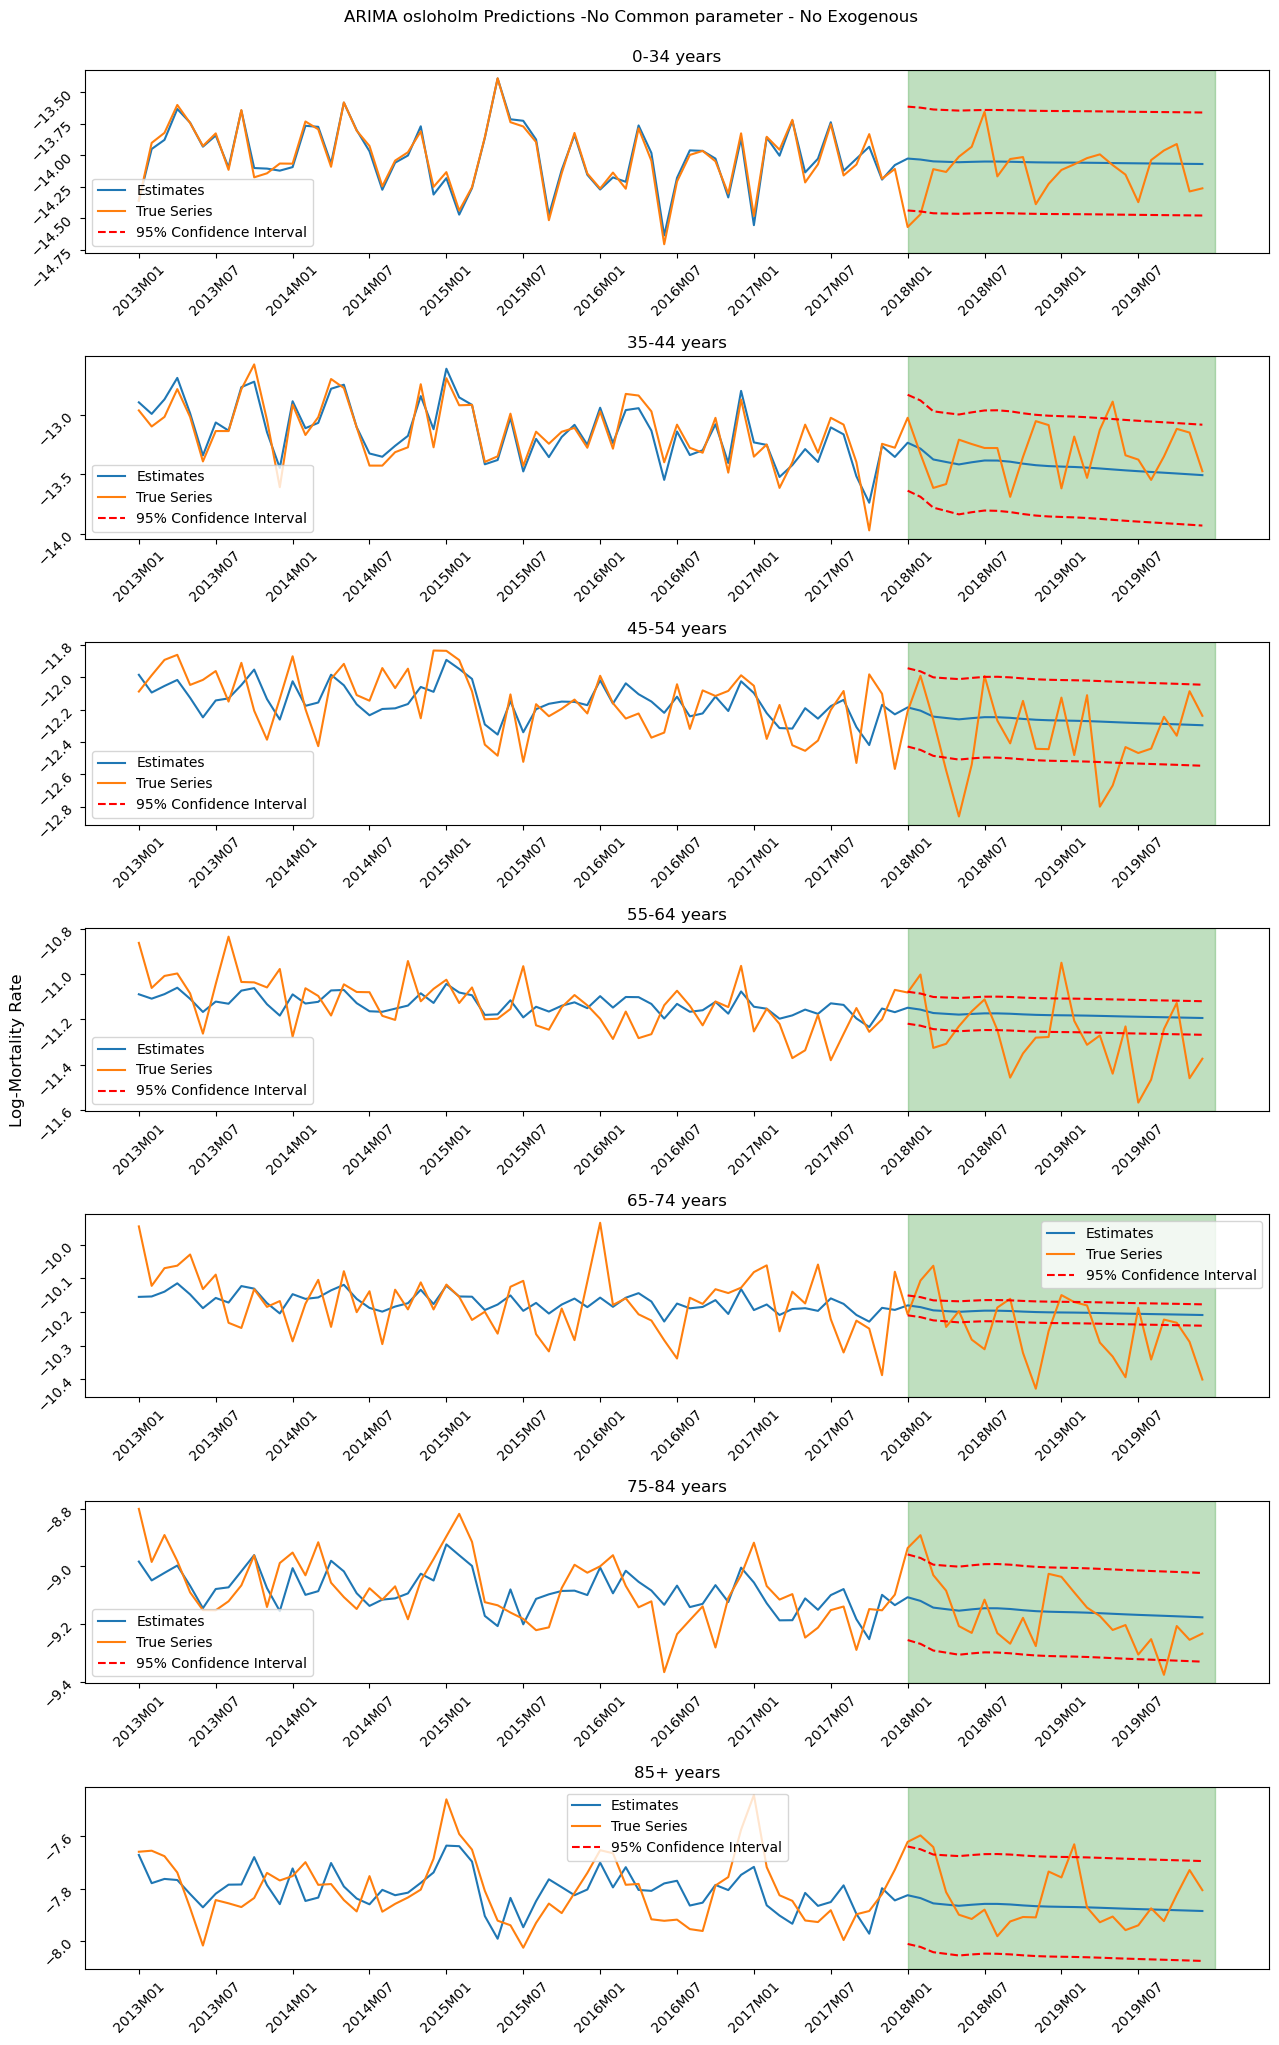

In [75]:
## Model No Common parameter - No Exogenous
a_xi,b_xs,k_ts,regional_re_est,k_t_models,k_t_preds,regional_predictions_nocommout,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_ = model_no_common(oslo_logmort_full,regional_terms = 2,prediction_period = 24,train_period = 60,region_deaths = oslo_death,region_pop = oslo_pop,re_est = False,smooth = False)

#exogenous_train = exog_train_oslo,exogenous_test = exog_test_oslo
regional_predictions_nocommout = pd.DataFrame(regional_predictions_nocommout)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_nocommout.index = oslo_logmort_full.index
regional_predictions_nocommout.columns = oslo_logmort_full.columns
regional_predictions_upconf.index = oslo_logmort_full.index
regional_predictions_upconf.columns = oslo_logmort_full.columns
regional_predictions_lowconf.index = oslo_logmort_full.index
regional_predictions_lowconf.columns = oslo_logmort_full.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_nocommout.iloc[:,:60],oslo_logmort_full.iloc[:,:60])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_nocommout.iloc[:,60:],oslo_logmort_full.iloc[:,60:])))
#print(k_t_models["model_0"].summary())

error_NoCom_wout = MAPE(regional_predictions_nocommout.iloc[:,60:],oslo_logmort_full.iloc[:,60:])
prediction_plots(regional_predictions_nocommout,regional_predictions_upconf,regional_predictions_lowconf,24,oslo_logmort_full,suptitle = "ARIMA osloholm Predictions -No Common parameter - No Exogenous ")



In [77]:
print(k_t_models['model_0'].summary())
print(k_t_models['model_1'].summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(4, 1, 1)   Log Likelihood                  46.299
Date:                Mon, 15 Jul 2024   AIC                            -78.597
Time:                        14:36:38   BIC                            -64.054
Sample:                             0   HQIC                           -72.920
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0049      0.002      2.675      0.007       0.001       0.009
ar.L1          0.0748      0.149      0.503      0.615      -0.217       0.366
ar.L2         -0.0385      0.137     -0.281      0.7

p_value k_t0 before re-estimation: 2.5157711648148084e-07 

p_value k_t1 before re-estimation: 0.9005704936979014 

Regional k_t1 is white noise with LB p_value 0.9005704936979014 

p_value k_t2 before re-estimation: 0.7186171314948346 

Regional k_t2 is white noise with LB p_value 0.7186171314948346 

p_value k_t3 before re-estimation: 4.946872777314123e-14 

Proportion of k_t values which are positive[0.5        0.53333333 0.48333333 0.5       ] 

Proportion of b_x values which are positive[0.         0.28571429 0.14285714 0.71428571] 

p_value k_t0 after re-estimation: 0.015451314752252967 

p_value k_t1 after re-estimation: 0.16554387436059465 

Regional k_t1 is white noise with LB p_value 0.16554387436059465 

p_value k_t2 after re-estimation: 0.2367791923190632 

Regional k_t2 is white noise with LB p_value 0.2367791923190632 

p_value k_t3 after re-estimation: 0.10383546584630855 

Regional k_t3 is white noise with LB p_value 0.10383546584630855 

Model Error 7.695309864327234
R

<Figure size 640x480 with 0 Axes>

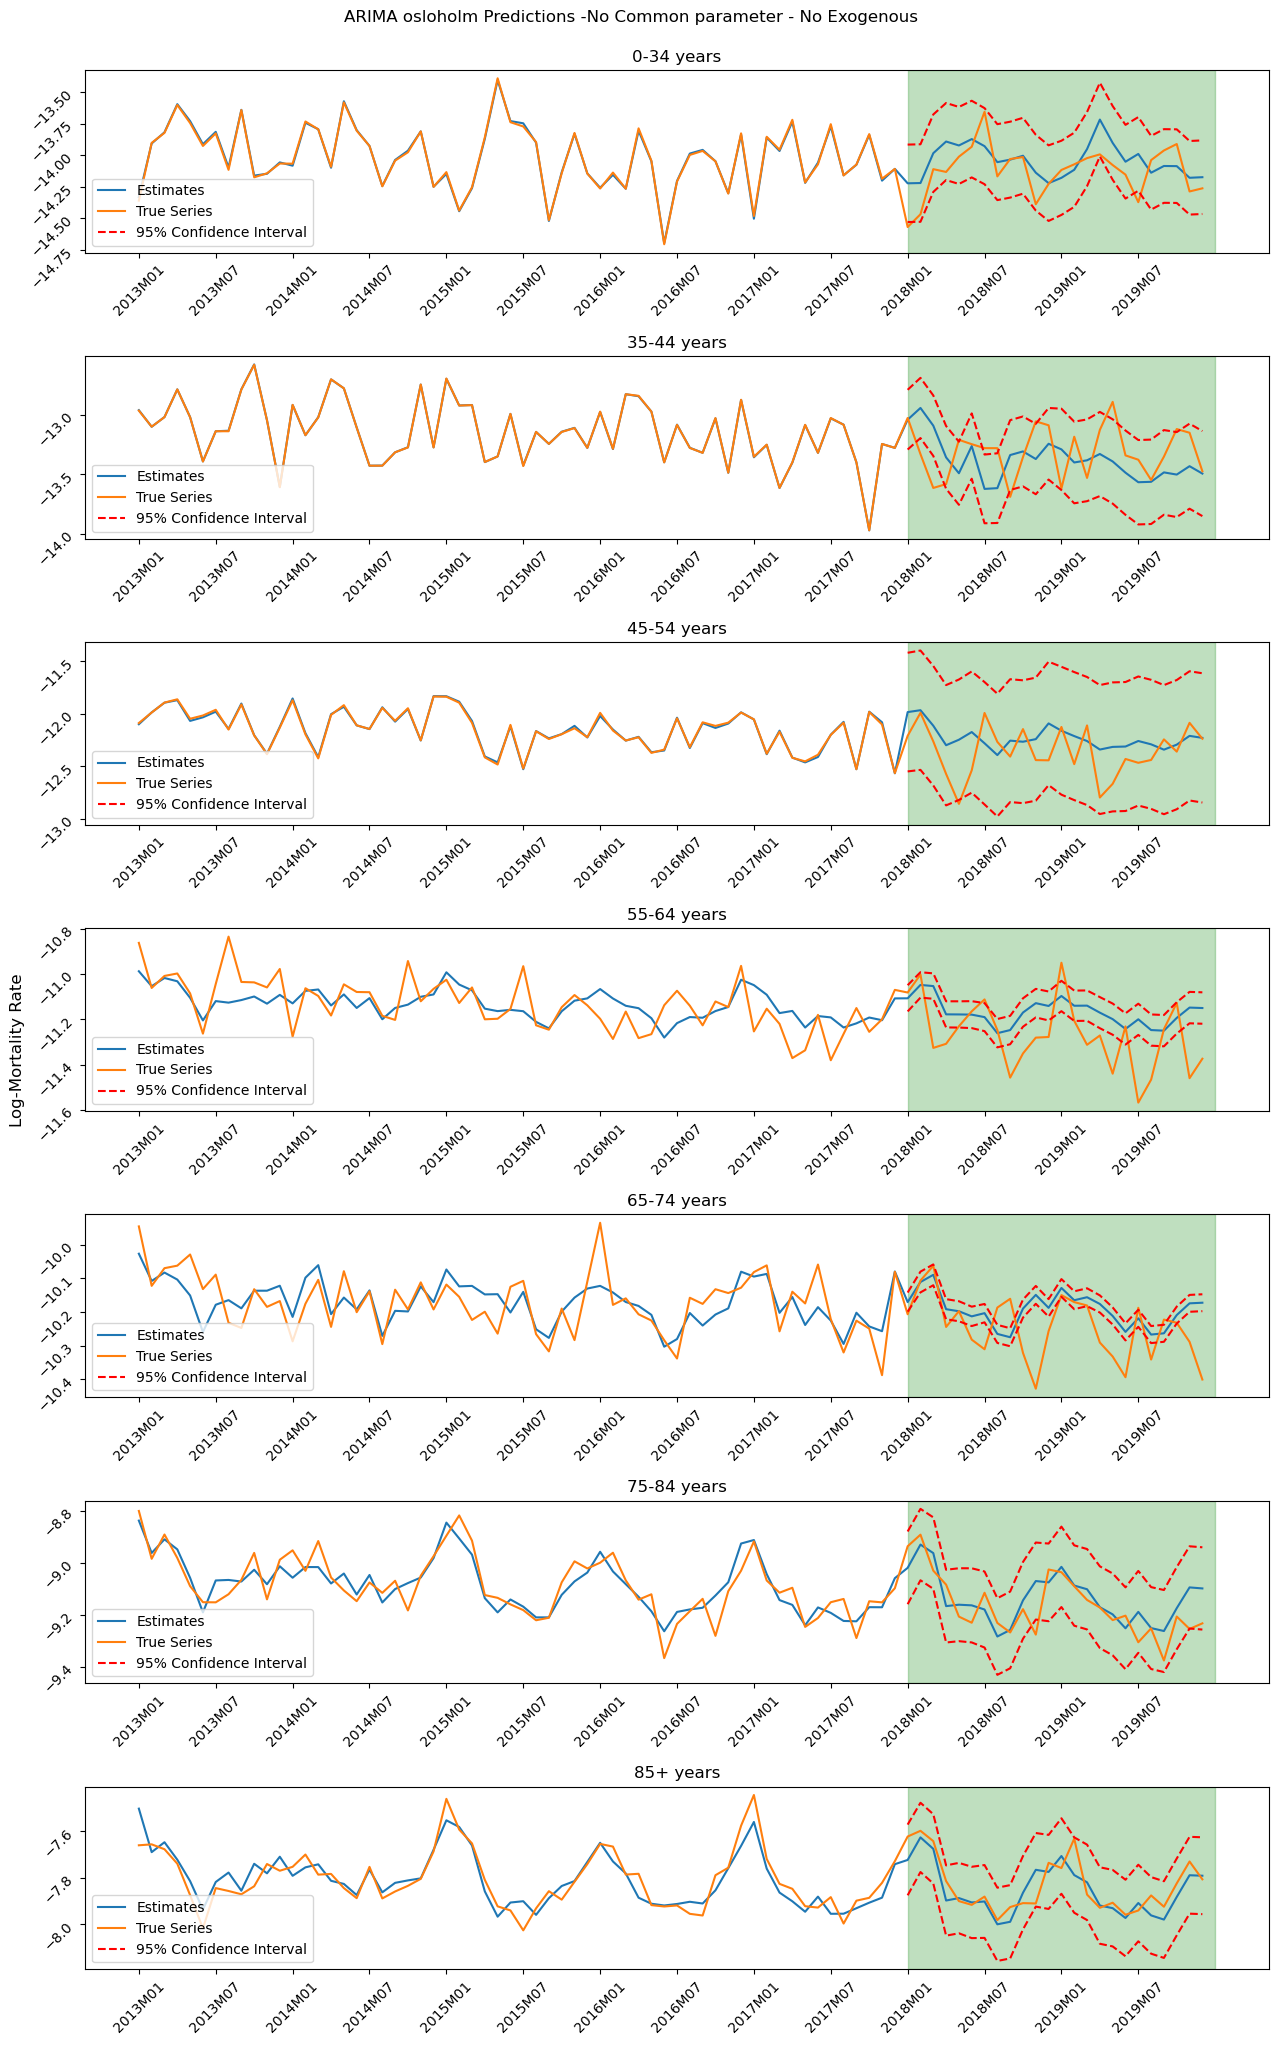

In [74]:
## Model No Common parameter - with Exogenous
a_xi,b_xs,k_ts,regional_re_est,k_t_models,k_t_preds,regional_predictions_nocommwith,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_ = model_no_common(oslo_logmort_full,regional_terms = 4,prediction_period = 24,train_period = 60,exogenous_train = exog_train_oslo,exogenous_test = exog_test_oslo,region_deaths = oslo_death,region_pop = oslo_pop,re_est = False,smooth = False)

#exogenous_train = exog_train_oslo,exogenous_test = exog_test_oslo
regional_predictions_nocommwith = pd.DataFrame(regional_predictions_nocommwith)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_nocommwith.index = oslo_logmort_full.index
regional_predictions_nocommwith.columns = oslo_logmort_full.columns
regional_predictions_upconf.index = oslo_logmort_full.index
regional_predictions_upconf.columns = oslo_logmort_full.columns
regional_predictions_lowconf.index = oslo_logmort_full.index
regional_predictions_lowconf.columns = oslo_logmort_full.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_nocommwith.iloc[:,:60],oslo_logmort_full.iloc[:,:60])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_nocommwith.iloc[:,60:],oslo_logmort_full.iloc[:,60:])))
print(k_t_models["model_0"].summary())

error_NoCom_with = MAPE(regional_predictions_nocommwith.iloc[:,60:],oslo_logmort_full.iloc[:,60:])
prediction_plots(regional_predictions_nocommwith,regional_predictions_upconf,regional_predictions_lowconf,24,oslo_logmort_full,suptitle = "ARIMA osloholm Predictions -No Common parameter - No Exogenous ")



In [24]:
print(k_t_models['model_0'].summary())
print(k_t_models['model_1'].summary())
print(k_t_models['model_2'].summary())
print(k_t_models['model_3'].summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                  44.648
Date:                            Mon, 08 Jul 2024   AIC                            -71.297
Time:                                    23:52:43   BIC                            -52.599
Sample:                                         0   HQIC                           -63.998
                                             - 60                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0034      0.001      2.835      0.005       0.001       0.006
av_temp        0.0074      0.006   

# SARIMAX Models pre-COVID With Common terms

p_value k_t0 before re-estimation: 0.8182093645519386 

Regional k_t0 is white noise with LB p_value 0.8182093645519386 

p_value k_t1 before re-estimation: 0.6172964754115547 

Regional k_t1 is white noise with LB p_value 0.6172964754115547 

p_value k_t2 before re-estimation: 0.1398988520006827 

Regional k_t2 is white noise with LB p_value 0.1398988520006827 

p_value k_t3 before re-estimation: 8.957143173539718e-08 

p_value k_t4 before re-estimation: 0.02908130121997984 

p_value k_t0 after re-estimation: 0.8182093645519386 

Regional k_t0 is white noise with LB p_value 0.8182093645519386 

p_value k_t1 after re-estimation: 0.6172964754115547 

Regional k_t1 is white noise with LB p_value 0.6172964754115547 

p_value k_t2 after re-estimation: 0.1398988520006827 

Regional k_t2 is white noise with LB p_value 0.1398988520006827 

p_value k_t3 after re-estimation: 8.957143173539718e-08 

p_value k_t4 after re-estimation: 0.02908130121997984 

Model Error 9.1703214577653
Re_estimation

<Figure size 640x480 with 0 Axes>

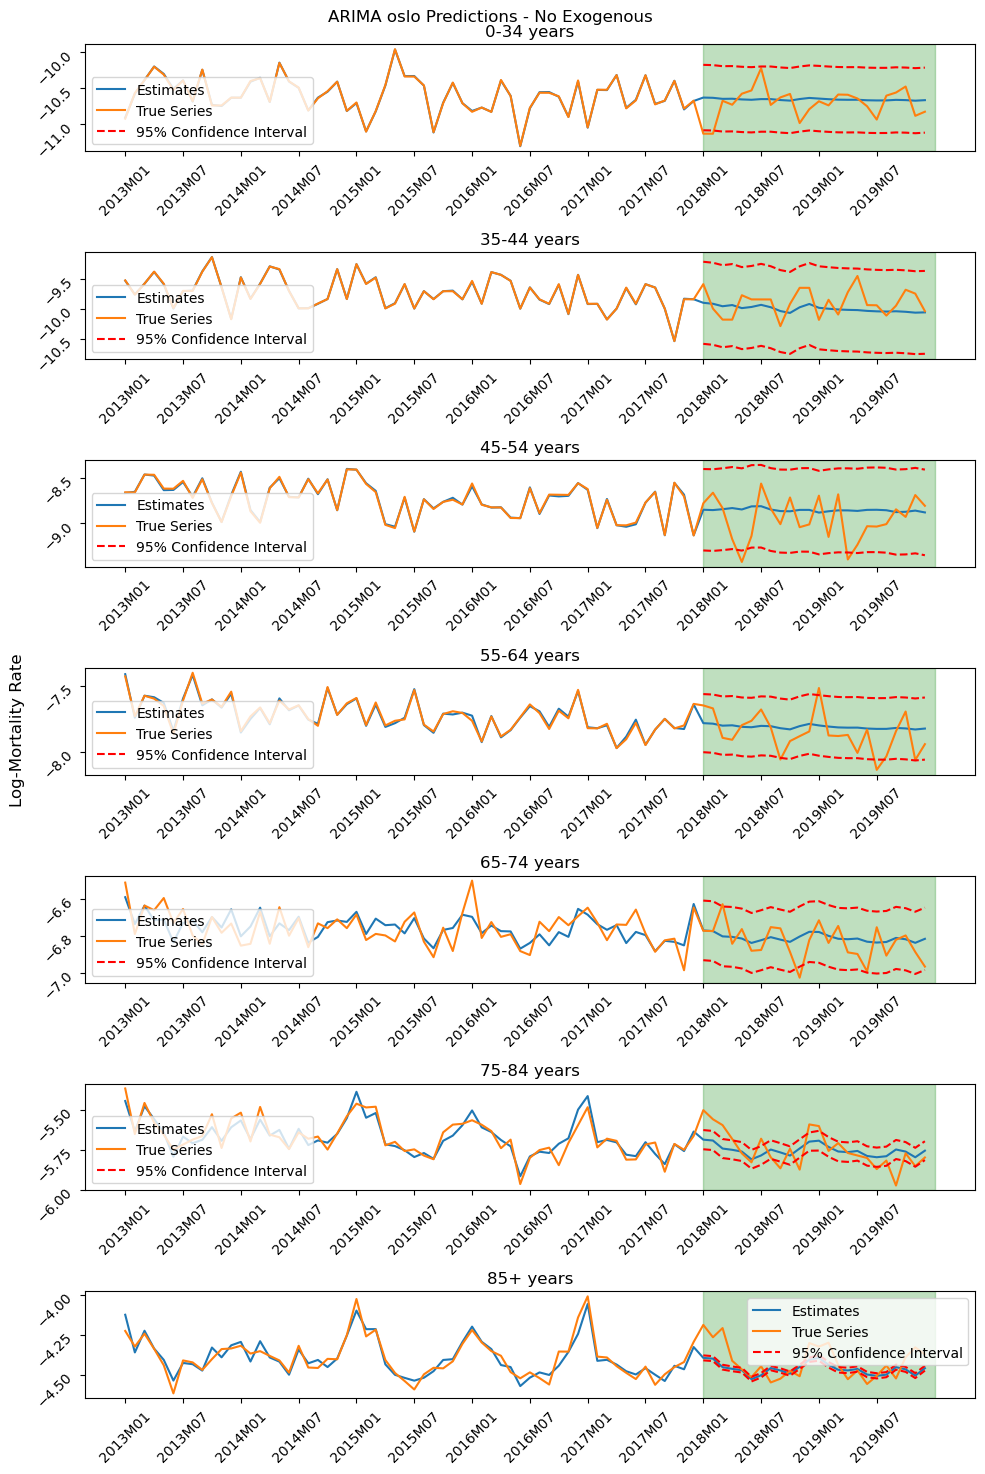

In [53]:
### Without Exogenous
a_xi,B_xs,K_ts,b_xs,k_ts,country_re_est,regional_re_est,K_t_models,k_t_models,K_t_preds,k_t_preds,regional_predictions_sarout,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_,_ = full_model(all_nor_logmort,oslo_logmort_full, common_terms = 1,regional_terms = 5,prediction_period = 24,train_period = 60,country_deaths = nor_death, country_pop = nor_pop,region_deaths = oslo_death,region_pop = oslo_pop,re_est = False,smooth = False)  


regional_predictions_sarout = pd.DataFrame(regional_predictions_sarout)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_sarout.index = oslo_logmort_full.index
regional_predictions_sarout.columns = oslo_logmort_full.columns
regional_predictions_upconf.index = oslo_logmort_full.index
regional_predictions_upconf.columns = oslo_logmort_full.columns
regional_predictions_lowconf.index = oslo_logmort_full.index
regional_predictions_lowconf.columns = oslo_logmort_full.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_sarout.iloc[:,:60],oslo_logmort_full.iloc[:,:60])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_sarout.iloc[:,60:],oslo_logmort_full.iloc[:,60:])))

error_SARIMAX_wout = MAPE(regional_predictions_sarout.iloc[:,60:],oslo_logmort_full.iloc[:,60:])
prediction_plots(regional_predictions_sarout,regional_predictions_upconf,regional_predictions_lowconf,24,oslo_logmort_full,suptitle = "ARIMA oslo Predictions - No Exogenous")



In [57]:
for mod in K_t_models.keys():
    print(str(K_t_models[mod].get_params()["order"]) + str(K_t_models[mod].get_params()["seasonal_order"]))
    
print("-")

for mod in k_t_models.keys():
    print(str(k_t_models[mod].get_params()["order"]) + str(k_t_models[mod].get_params()["seasonal_order"]))
 



(0, 0, 1)(1, 1, 0, 12)
-
(1, 0, 0)(0, 0, 0, 12)
(0, 0, 0)(2, 0, 0, 12)
(2, 1, 1)(2, 0, 0, 12)
(5, 1, 0)(0, 0, 0, 12)
(0, 0, 0)(0, 0, 0, 12)


p_value k_t0 before re-estimation: 0.8182093645519386 

Regional k_t0 is white noise with LB p_value 0.8182093645519386 

p_value k_t0 after re-estimation: 0.8182093645519386 

Regional k_t0 is white noise with LB p_value 0.8182093645519386 

Re_estimation error Each Age Group (MAPE): [0.31194714 1.5748508  1.64303351 1.06756797 0.96549382 1.25240241
 1.69882015]

 Prediction Error Each Age Group (MAPE)[1.23037065 1.91209223 2.28472436 1.6539898  1.09880846 1.35829072
 1.68207333]


<Figure size 640x480 with 0 Axes>

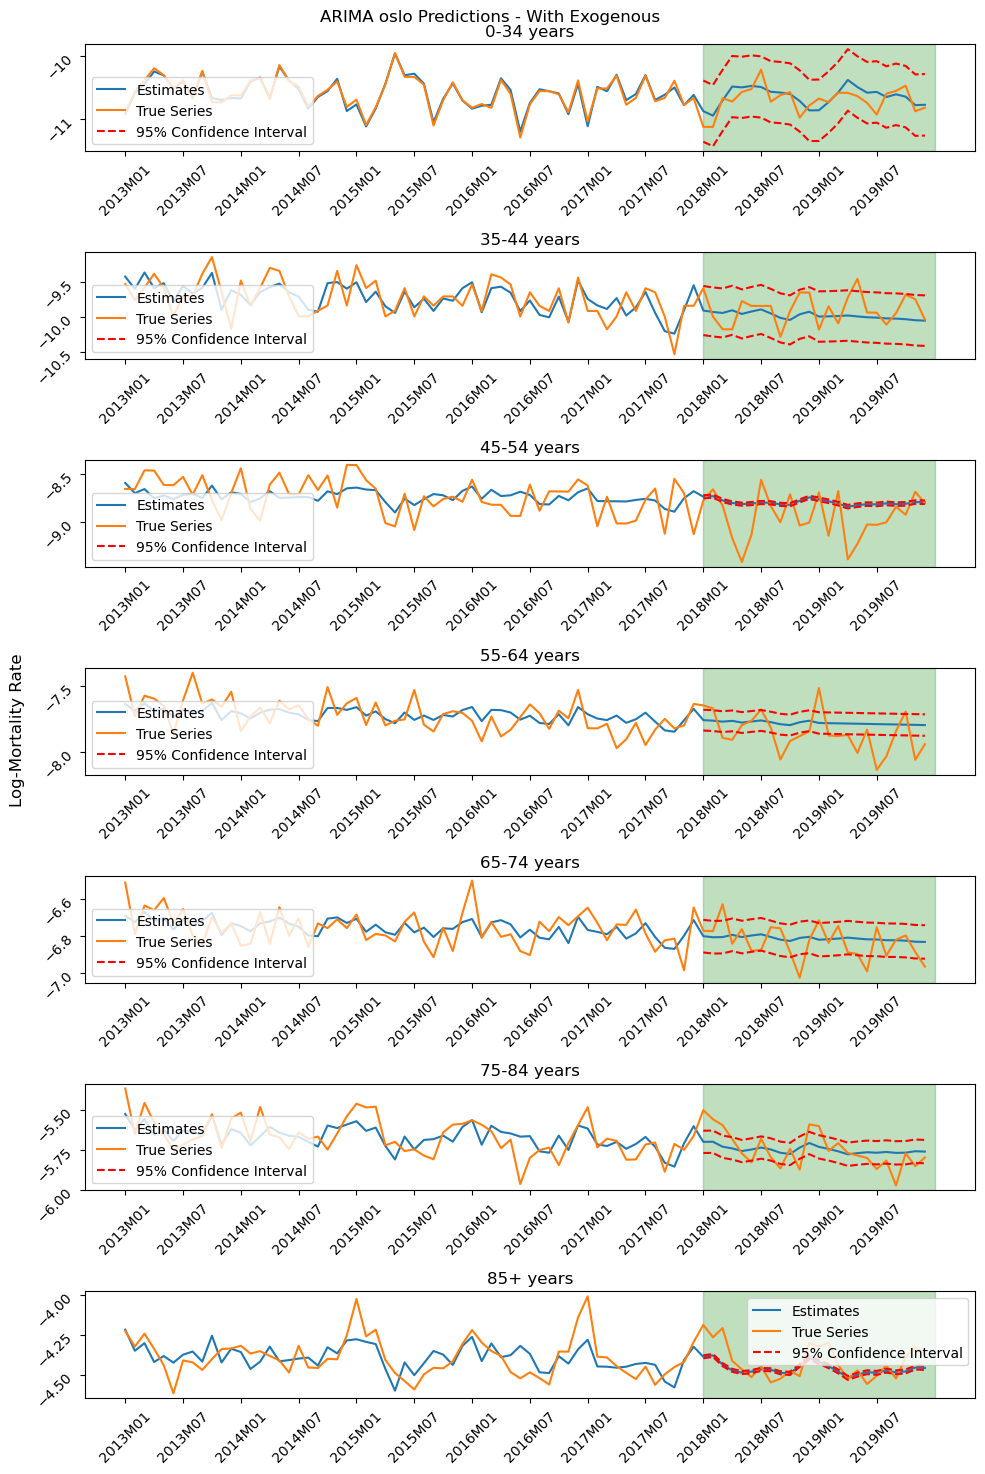

In [54]:
### With Exogenous
a_xi,B_xs,K_ts,b_xs,k_ts,country_re_est,regional_re_est,K_t_models,k_t_models,K_t_preds,k_t_preds,regional_predictions_sarwith,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_,_ = full_model(all_nor_logmort,oslo_logmort_full, common_terms = 1,regional_terms = 1,prediction_period = 24,train_period = 60,exogenous_train = exog_train_oslo,exogenous_test = exog_test_oslo,country_deaths = nor_death, country_pop = nor_pop,region_deaths = oslo_death,region_pop = oslo_pop,re_est = False,smooth=False)  


regional_predictions_sarwith = pd.DataFrame(regional_predictions_sarwith)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_sarwith.index = oslo_logmort_full.index
regional_predictions_sarwith.columns = oslo_logmort_full.columns
regional_predictions_upconf.index = oslo_logmort_full.index
regional_predictions_upconf.columns = oslo_logmort_full.columns
regional_predictions_lowconf.index = oslo_logmort_full.index
regional_predictions_lowconf.columns = oslo_logmort_full.columns

print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_sarwith.iloc[:,:60],oslo_logmort_full.iloc[:,:60])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_sarwith.iloc[:,60:],oslo_logmort_full.iloc[:,60:])))

#print(str(k_t_models["model_0"].summary()))
#print(k_t_models["model_1"].summary())
error_SARIMAX_w= MAPE(regional_predictions_sarwith.iloc[:,60:],oslo_logmort_full.iloc[:,60:])

prediction_plots(regional_predictions_sarwith,regional_predictions_upconf,regional_predictions_lowconf,24,oslo_logmort_full,suptitle = "ARIMA oslo Predictions - With Exogenous")



In [60]:
for mod in K_t_models.keys():
    print(str(K_t_models[mod].get_params()["order"]) + str(K_t_models[mod].get_params()["seasonal_order"]))
    
print("-")

for mod in k_t_models.keys():
    print(str(k_t_models[mod].get_params()["order"]) + str(k_t_models[mod].get_params()["seasonal_order"]))
 



(0, 0, 1)(1, 1, 0, 12)
-
(0, 0, 0)(0, 0, 0, 12)


## VARMAX Models

test_errors[1.88849883 2.39902414 2.34124165 1.62422073 1.22399744 1.67630402
 1.75378211]


<Figure size 640x480 with 0 Axes>

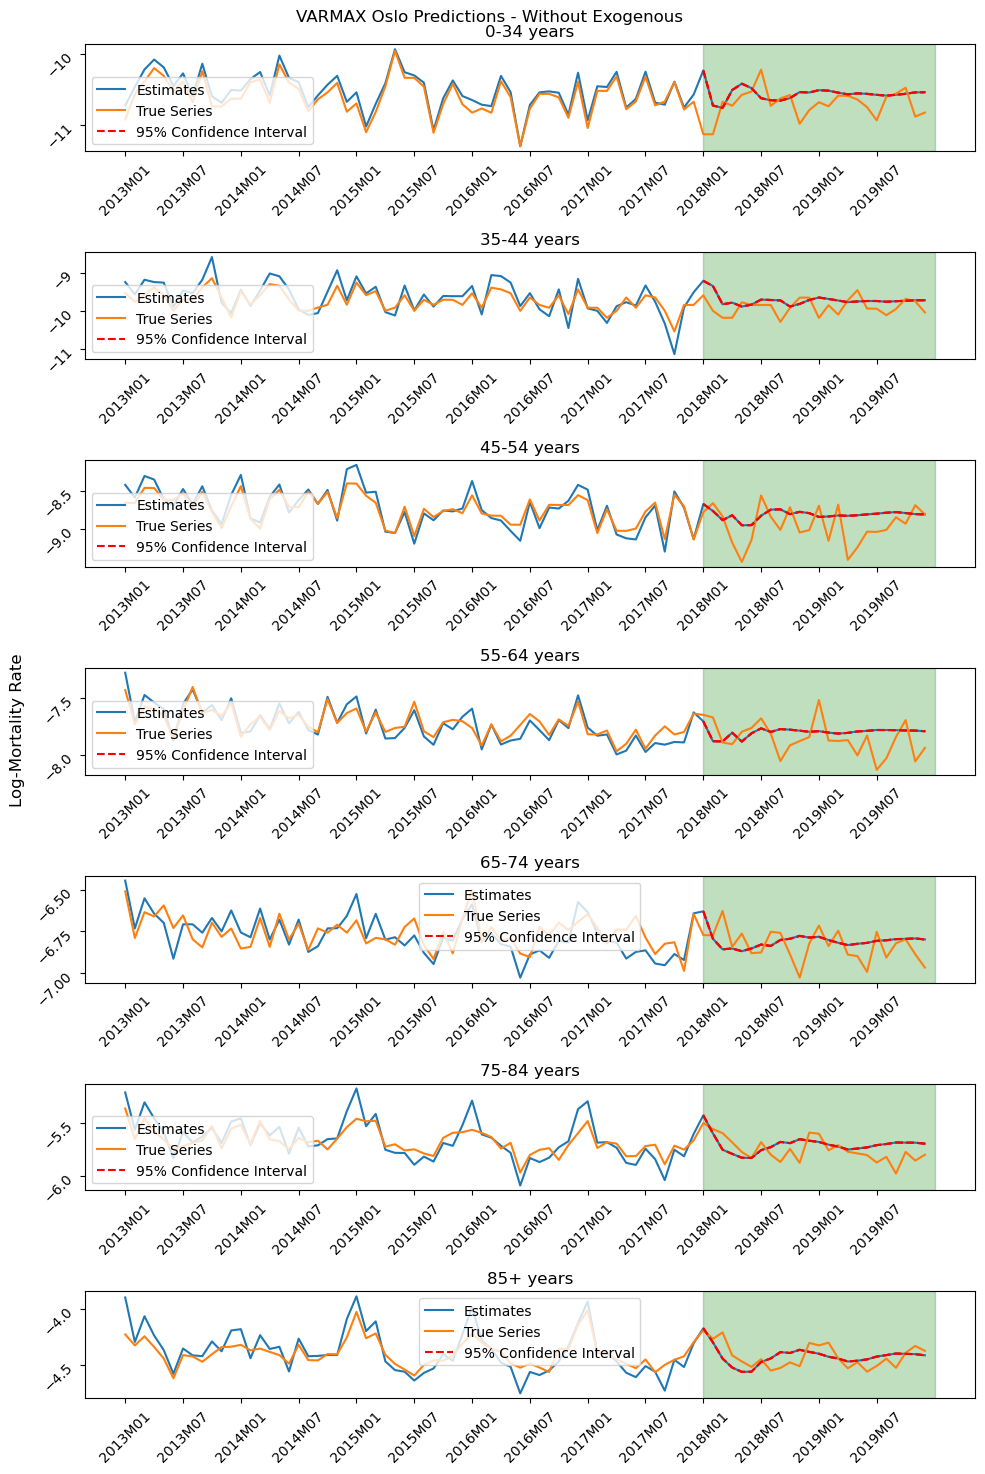

In [55]:
### Without Exogenous
all_k_t, K_ts,k_ts,B_xs,b_xs,a_xi,all_k_preds,predictions_varout,predictions_lowconf,predictions_upconf,model_VAR_wout,aic,error_VAR_wout,_,_ = VARMAX_model(all_nor_logmort,oslo_logmort_full, common_terms = 2,regional_terms = 5,prediction_period = 24,train_period = 60,AR= 3,MA = 2,country_deaths = nor_death,country_pop = nor_pop,region_deaths = oslo_death,region_pop = oslo_pop,re_est = False,smooth = False)

print("test_errors" + str(error_VAR_wout))
prediction_plots(predictions_varout,predictions_varout,predictions_varout,24,oslo_logmort_full,suptitle = "VARMAX Oslo Predictions - Without Exogenous")



test_errors[2.5678367  2.16908221 2.40003976 1.81156906 1.15708235 1.50595192
 1.24898581]


<Figure size 640x480 with 0 Axes>

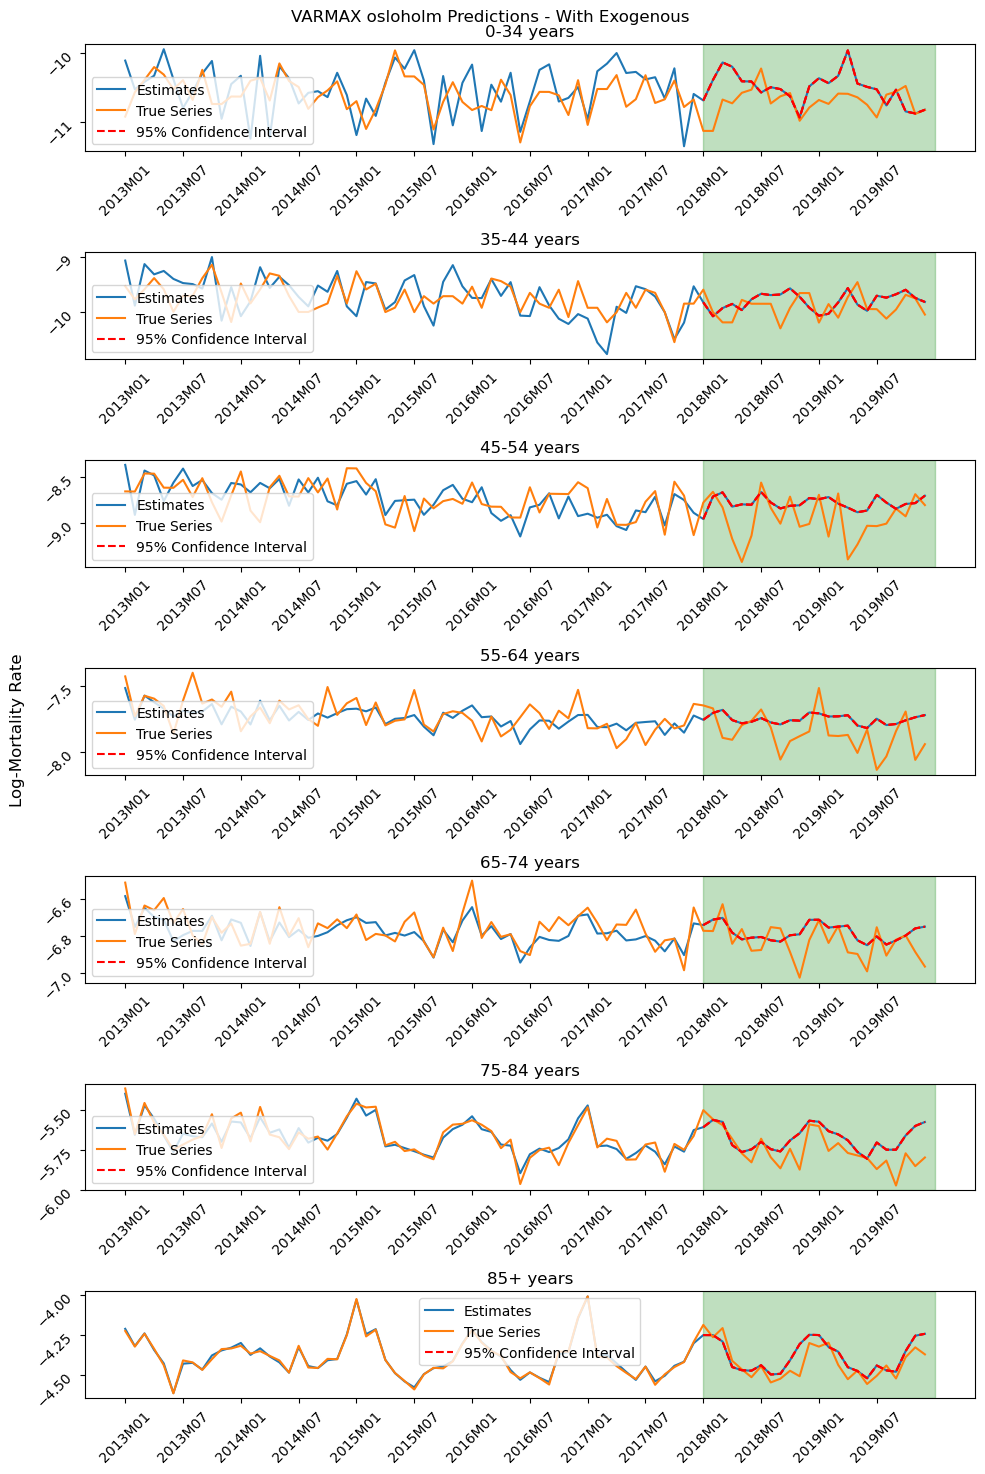

In [56]:
### With Exogenous
all_k_t, K_ts,k_ts,B_xs,b_xs,a_xi,all_k_preds,predictions_varwith,predictions_lowconf,predictions_upconf,model_VAR_with,aic,error_VAR_w,_,_ = VARMAX_model(all_nor_logmort,oslo_logmort_full, common_terms = 4,regional_terms = 2,prediction_period = 24,train_period = 60,AR= 2,MA = 3,exogenous_train = exog_train_oslo,exogenous_test = exog_test_oslo,country_deaths = nor_death,country_pop = nor_pop,region_deaths = oslo_death,region_pop = oslo_pop,re_est = True)

print("test_errors" + str(error_VAR_w))
prediction_plots(predictions_varwith,predictions_varwith,predictions_varwith,24,oslo_logmort_full,suptitle = "VARMAX osloholm Predictions - With Exogenous")



In [42]:
model_VAR_with.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                            
=================================================================================
Dep. Variable:     [0, 1, 2, 3, 4, 5, 6]   No. Observations:                   60
Model:                       VARMAX(2,5)   Log Likelihood                 191.136
                             + intercept   AIC                            443.727
Date:                   Wed, 12 Jun 2024   BIC                           1308.691
Time:                           11:57:50   HQIC                           782.062
Sample:                                0                                         
                                    - 60                                         
Covariance Type:                     opg                                         
===============================================================================================================================
Ljung-Box (L1) (Q):     0.45, 5.37, 4.92, 0.57, 0.00, 0.02, 0.15   Jarque-Bera (JB):   0.91, 2.75, 1.97, 0.78, 0.22, 0.37, 0.20
Prob(Q):                0.50, 0.02, 0.03, 0.45, 0.99, 0.89, 0.70   Prob(JB):           0.63, 0.25, 0.37, 0.68, 0.90, 0.83, 0.91
Heteroskedasticity (H): 0.98, 1.71, 1.26, 0.97, 1.52, 1.70, 1.60   Skew:               0.30, 0.42, 0.24, 0.19, 0.06, 0.19, 0.07
Prob(H) (two-sided):    0.97, 0.24, 0.61, 0.95, 0.36, 0.24, 0.30   Kurtosis:           3.01, 2.36, 2.26, 2.60, 3.27, 2.90, 2.75
                               Results for equation 0                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -0.1934      0.002   -104.484      0.000      -0.197      -0.190
L1.0                0.1206      0.004     34.378      0.000       0.114       0.128
L1.1               -0.0376      0.007     -5.153      0.000      -0.052      -0.023
L1.2                0.0303      0.004      8.642      0.000       0.023       0.037
L1.3               -0.1976      0.005    -43.061      0.000      -0.207      -0.189
L1.4                0.1775      0.003     56.833      0.000       0.171       0.184
L1.5                0.0411      0.004      9.975      0.000       0.033       0.049
L1.6                0.0035      0.003      1.211      0.226      -0.002       0.009
L2.0                0.4342      0.048      9.036      0.000       0.340       0.528
L2.1               -0.0444      0.011     -4.188      0.000      -0.065      -0.024
L2.2               -0.2047      0.004    -53.990      0.000      -0.212      -0.197
L2.3                0.2528      0.025      9.946      0.000       0.203       0.303
L2.4               -0.2768      0.043     -6.474      0.000      -0.361      -0.193
L2.5               -0.3596      0.057     -6.327      0.000      -0.471      -0.248
L2.6                0.4821      0.041     11.690      0.000       0.401       0.563
L1.e(0)            -0.1988      0.006    -31.643      0.000      -0.211      -0.186
L1.e(1)             0.1474      0.012     12.637      0.000       0.125       0.170
L1.e(2)             0.0347      0.043      0.800      0.424      -0.050       0.120
L1.e(3)            -0.0152      0.017     -0.904      0.366      -0.048       0.018
L1.e(4)             0.3218      0.013     25.075      0.000       0.297       0.347
L1.e(5)             0.4506      0.024     19.056      0.000       0.404       0.497
L1.e(6)            -0.2768      0.006    -45.158      0.000      -0.289      -0.265
L2.e(0)             0.1584      0.028      5.564      0.000       0.103       0.214
L2.e(1)            -0.1616      0.014    -11.749      0.000      -0.189      -0.135
L2.e(2)             0.2086      0.016     12.650      0.000       0.176       0.241
L2.e(3)             0.1777      0.047      3.795      0.

In [16]:
all_nor_logmort.index

Index(['0-34 years', '35-44 years', '45-54 years', '55-64 years',
       '65-74 years', '75-84 years', '85+ years'],
      dtype='object', name='Age_band')

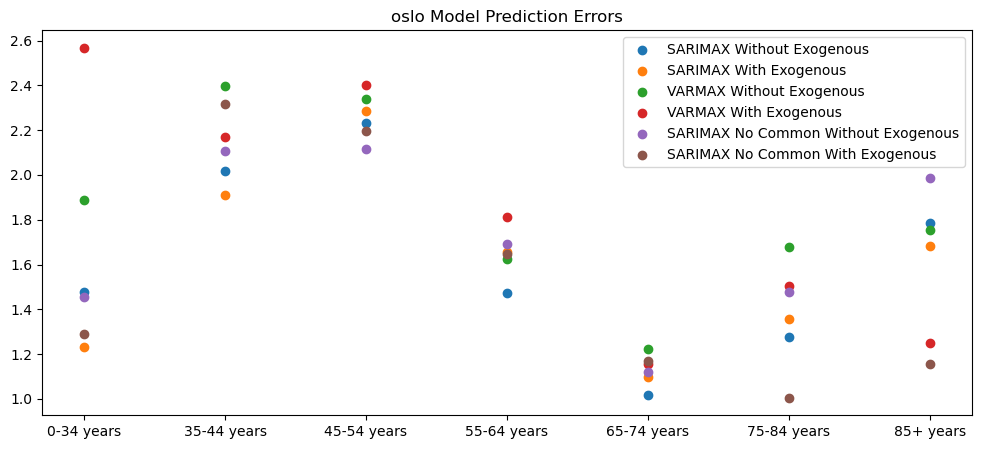

In [57]:
test_errors = np.vstack((error_SARIMAX_wout,error_SARIMAX_w,error_VAR_wout,error_VAR_w,error_NoCom_wout,error_NoCom_with))
oslo = test_errors

age_groups = all_nor_logmort.index
plt.figure(figsize = (12,5))
plt.scatter(age_groups,oslo[0,:],label = "SARIMAX Without Exogenous")
plt.scatter(age_groups,oslo[1,:],label = "SARIMAX With Exogenous")
plt.scatter(age_groups,oslo[2,:],label = "VARMAX Without Exogenous")
plt.scatter(age_groups,oslo[3,:],label = "VARMAX With Exogenous")
plt.scatter(age_groups,oslo[4,:],label = "SARIMAX No Common Without Exogenous")
plt.scatter(age_groups,oslo[5,:],label = "SARIMAX No Common With Exogenous")
plt.legend();
plt.title("oslo Model Prediction Errors");

In [22]:
np.mean(oslo,axis = 1)

array([1.85687115, 1.90860831, 2.74465515, 2.23472762, 2.03003413,
       1.86944265])

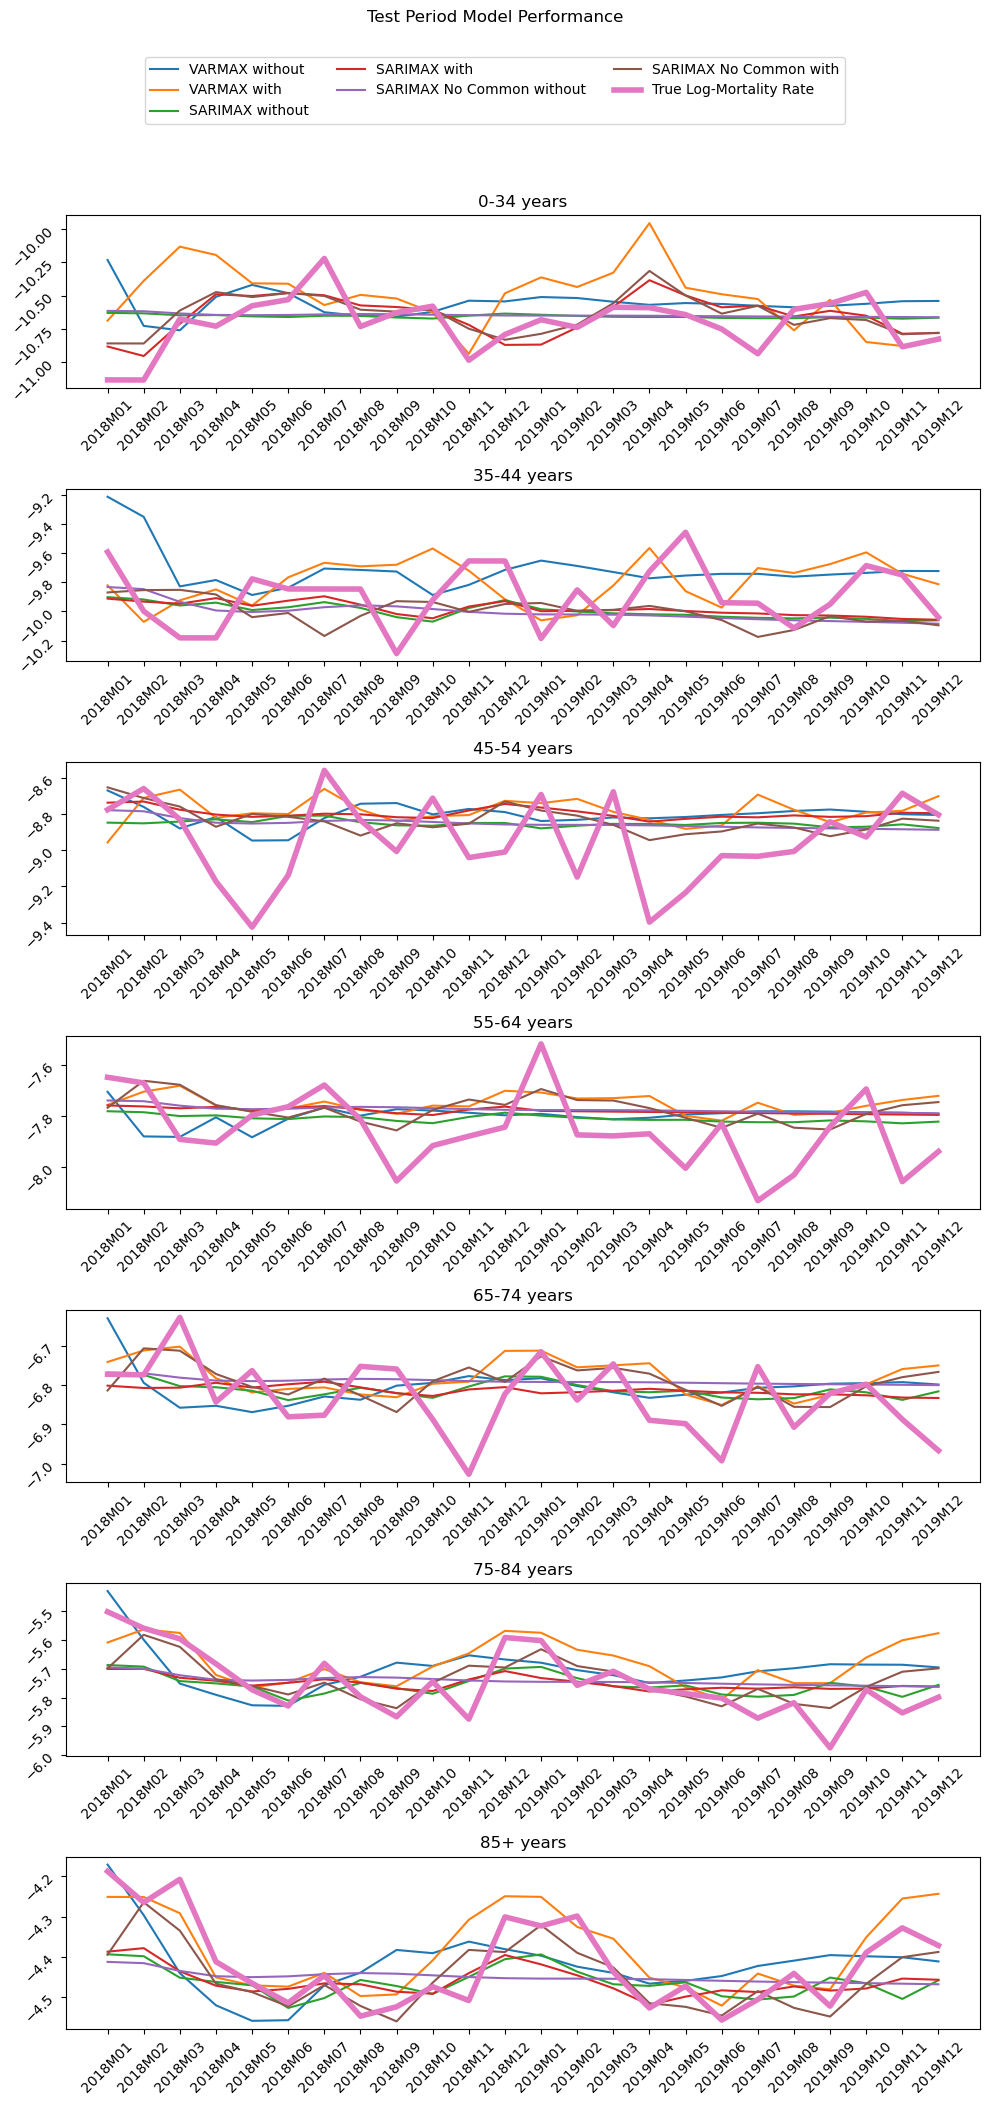

In [58]:
predictions_varwith = pd.DataFrame(predictions_varwith)
predictions_varwith.index = oslo_logmort_full.index
predictions_varwith.columns = oslo_logmort_full.columns

predictions_varout = pd.DataFrame(predictions_varout)
predictions_varout.index = oslo_logmort_full.index
predictions_varout.columns = oslo_logmort_full.columns


age_groups = all_nor_logmort.index
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 20))

# Store lines and labels to create a single legend
lines = []
labels = []

for row in range(7):
    age = age_groups[row]
    axes[row].set_title(age)
    
    line1, = axes[row].plot(predictions_varout.iloc[row, 60:], label="VARMAX without")
    line2, = axes[row].plot(predictions_varwith.iloc[row, 60:], label="VARMAX with")
    line3, = axes[row].plot(regional_predictions_sarout.iloc[row, 60:], label="SARIMAX without")
    line4, = axes[row].plot(regional_predictions_sarwith.iloc[row, 60:], label="SARIMAX with")
    line5, = axes[row].plot(regional_predictions_nocommout.iloc[row, 60:], label="SARIMAX No Common without")
    line6, = axes[row].plot(regional_predictions_nocommwith.iloc[row, 60:], label="SARIMAX No Common with")
    line7, = axes[row].plot(oslo_logmort_full.iloc[row, 60:], label="True Log-Mortality Rate", linewidth=4)
    
    axes[row].tick_params(rotation=45)
    
    # Collect lines and labels for the legend
    if row == 0:
        lines.extend([line1, line2, line3, line4, line5, line6, line7])
        labels.extend([line.get_label() for line in lines])

# Create a single legend
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=3)
plt.suptitle("Test Period Model Performance", y=1.05)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# COVID Period Modelling

p_value k_t0 before re-estimation: 5.694295534203193e-65 

p_value k_t1 before re-estimation: 0.003658672174908468 

Proportion of k_t values which are positive[0.54761905 0.51190476] 

Proportion of b_x values which are positive[0.         0.42857143] 

p_value k_t0 after re-estimation: 3.328300183040162e-29 

p_value k_t1 after re-estimation: 0.0045381950060474924 

Model Error 10.813648902600562
Re_estimation error Each Age Group (MAPE): [0.26333141 0.82666001 1.02645361 0.76814167 0.69371556 0.78909527
 0.95682988]

 Prediction Error Each Age Group (MAPE)[1.58431088 3.3181343  1.65256564 0.69050861 0.76895664 1.02435387
 1.77481895]


<Figure size 640x480 with 0 Axes>

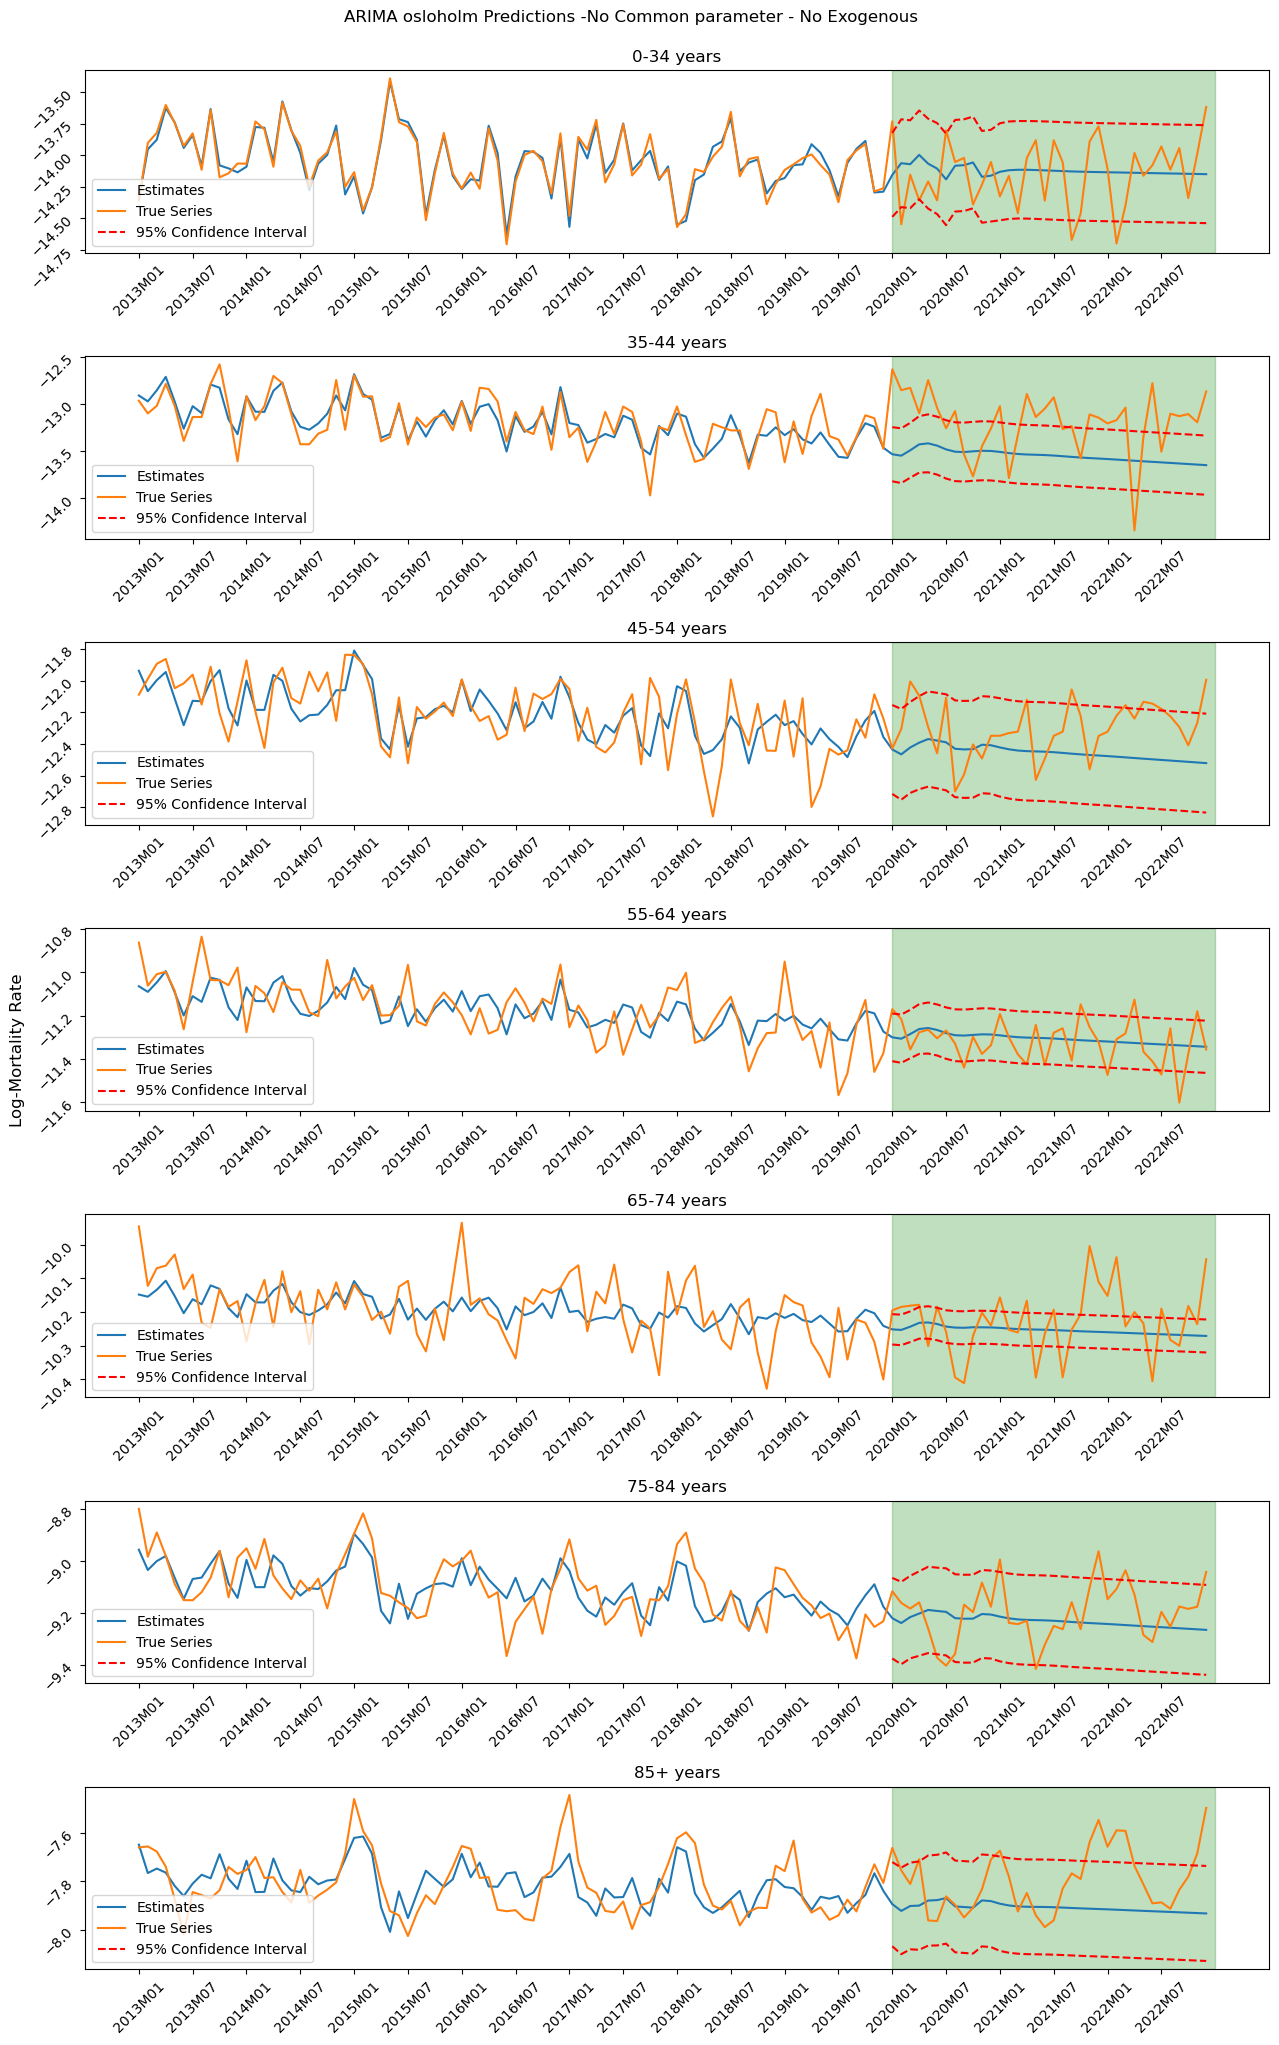

In [78]:
## Model No Common parameter - No Exogenous
a_xi,b_xs,k_ts,regional_re_est,k_t_models,k_t_preds,regional_predictions_nocommoutCOVID,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,D = model_no_common(oslo_logmort_incCOVID,regional_terms = 2,prediction_period = 36,train_period = 84,region_deaths = oslo_death_COVID,region_pop = oslo_pop_COVID,re_est = False,smooth = False)

#exogenous_train = exog_train_oslo,exogenous_test = exog_test_oslo
regional_predictions_nocommoutCOVID = pd.DataFrame(regional_predictions_nocommoutCOVID)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_nocommoutCOVID.index = oslo_logmort_incCOVID.index
regional_predictions_nocommoutCOVID.columns = oslo_logmort_incCOVID.columns
regional_predictions_upconf.index = oslo_logmort_incCOVID.index
regional_predictions_upconf.columns = oslo_logmort_incCOVID.columns
regional_predictions_lowconf.index = oslo_logmort_incCOVID.index
regional_predictions_lowconf.columns = oslo_logmort_incCOVID.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_nocommoutCOVID.iloc[:,:84],oslo_logmort_incCOVID.iloc[:,:84])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_nocommoutCOVID.iloc[:,84:],oslo_logmort_incCOVID.iloc[:,84:])))
#print(k_t_models["model_0"].summary())

##oslo_pop_inCOVID = undo_person_days(pd.DataFrame(oslo_pop_inCOVID,columns = oslo_logmort_incCOVID.columns[-36:]))


exp_term = np.multiply(np.exp(a_xi+b_xs@np.diag(D)[:2,:2]@k_t_preds[:,84:]),oslo_pop_inCOVID) ### Add scaling of singular values
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(oslo_death_inCOVID,axis = 1)

error_NoCom_woutCOVID = MAPE(regional_predictions_nocommoutCOVID.iloc[:,84:],oslo_logmort_incCOVID.iloc[:,84:])
prediction_plots(regional_predictions_nocommoutCOVID,regional_predictions_upconf,regional_predictions_lowconf,36,oslo_logmort_incCOVID,suptitle = "ARIMA osloholm Predictions -No Common parameter - No Exogenous ")



In [79]:
oslo_NoCom_NoExog_deaths_20 = pd.DataFrame(exp_term).iloc[:,:6].sum(axis = 1) #only first half of 2020
oslo_NoCom_NoExog_deaths_20_21 = epi_year(pd.DataFrame(exp_term))["year_0"].sum(axis = 1)
oslo_NoCom_NoExog_deaths_21_22 = epi_year(pd.DataFrame(exp_term))["year_1"].sum(axis = 1)
oslo_NoCom_NoExog_deaths_22 = epi_year(pd.DataFrame(exp_term))["year_2"].sum(axis = 1)

p_value k_t0 before re-estimation: 5.694295534203193e-65 

p_value k_t1 before re-estimation: 0.003658672174908468 

p_value k_t2 before re-estimation: 0.5469206489703343 

Regional k_t2 is white noise with LB p_value 0.5469206489703343 

Proportion of k_t values which are positive[0.54761905 0.51190476 0.46428571] 

Proportion of b_x values which are positive[0.         0.42857143 0.14285714] 

p_value k_t0 after re-estimation: 3.328300183040162e-29 

p_value k_t1 after re-estimation: 0.0045381950060474924 

p_value k_t2 after re-estimation: 0.345485217468017 

Regional k_t2 is white noise with LB p_value 0.345485217468017 

Model Error 10.332412065375182
Re_estimation error Each Age Group (MAPE): [0.11794603 0.15081283 0.49511597 0.74033128 0.67282615 0.73528112
 0.92303652]

 Prediction Error Each Age Group (MAPE)[1.59545232 3.24350762 1.60102903 0.70210703 0.71960191 0.84566727
 1.62504688]


<Figure size 640x480 with 0 Axes>

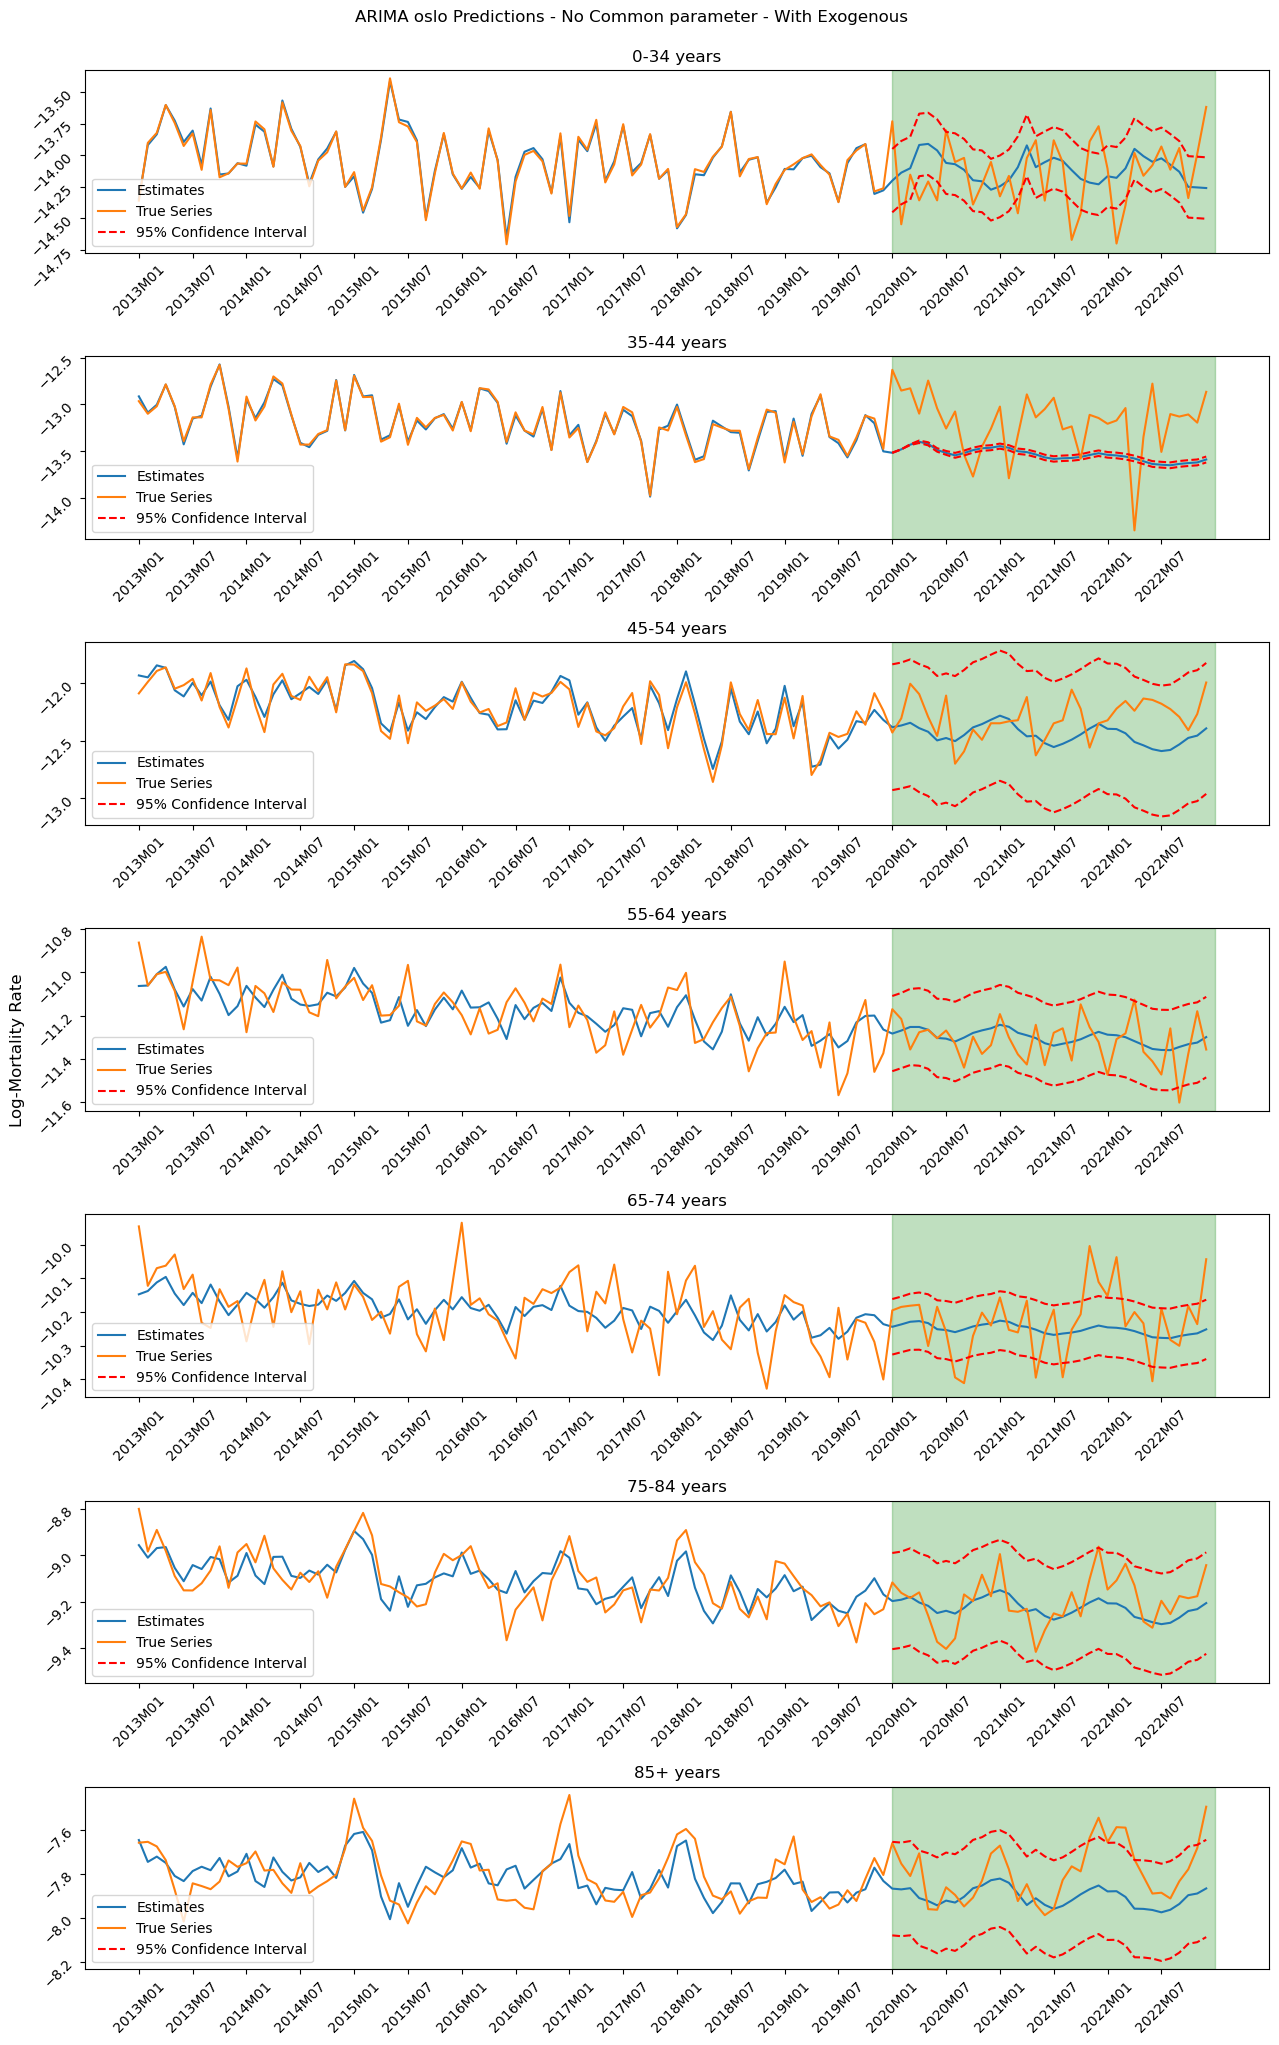

In [80]:
## Model No nocommon parameter - With Exogenous
exog_train_oslo_COVID_2 = exog_train_oslo_COVID.iloc[:,:2]
exog_test_oslo_COVID_2 = exog_test_oslo_COVID.iloc[:,:2]

a_xi,b_xs,k_ts,regional_re_est,k_t_models,k_t_preds,regional_predictions_nocommwithCOVID,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,D = model_no_common(oslo_logmort_incCOVID,regional_terms = 3,prediction_period = 36,train_period = 84,exogenous_train = exog_train_oslo_COVID_2,exogenous_test = exog_test_oslo_COVID_2,region_deaths = oslo_death_COVID,region_pop = oslo_pop_COVID,re_est = False,smooth = False)

#exogenous_train = exog_train_oslo,exogenous_test = exog_test_oslo
regional_predictions_nocommwithCOVID = pd.DataFrame(regional_predictions_nocommwithCOVID)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_nocommwithCOVID.index = oslo_logmort_incCOVID.index
regional_predictions_nocommwithCOVID.columns = oslo_logmort_incCOVID.columns
regional_predictions_upconf.index = oslo_logmort_incCOVID.index
regional_predictions_upconf.columns = oslo_logmort_incCOVID.columns
regional_predictions_lowconf.index = oslo_logmort_incCOVID.index
regional_predictions_lowconf.columns = oslo_logmort_incCOVID.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_nocommwithCOVID.iloc[:,:84],oslo_logmort_incCOVID.iloc[:,:84])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_nocommwithCOVID.iloc[:,84:],oslo_logmort_incCOVID.iloc[:,84:])))
#print(k_t_models["model_0"].summary())

#oslo_pop_inCOVID = undo_person_days(pd.DataFrame(oslo_pop_inCOVID,columns = oslo_logmort_incCOVID.columns[-36:]))


exp_term = np.multiply(np.exp(a_xi+ b_xs@np.diag(D)[:3,:3]@k_t_preds[:,84:]),oslo_pop_inCOVID) ### Add scaling of singular values
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(oslo_death_inCOVID,axis = 1)



error_NoCom_withCOVID = MAPE(regional_predictions_nocommwithCOVID.iloc[:,84:],oslo_logmort_incCOVID.iloc[:,84:])
prediction_plots(regional_predictions_nocommwithCOVID,regional_predictions_upconf,regional_predictions_lowconf,36,oslo_logmort_incCOVID,suptitle = "ARIMA oslo Predictions - No Common parameter - With Exogenous ")



In [81]:
oslo_NoCom_WithExog_deaths_20 = pd.DataFrame(exp_term).iloc[:,:6].sum(axis = 1) #only first half of 2020
oslo_NoCom_WithExog_deaths_20_21 = epi_year(pd.DataFrame(exp_term))["year_0"].sum(axis = 1)
oslo_NoCom_WithExog_deaths_21_22 = epi_year(pd.DataFrame(exp_term))["year_1"].sum(axis = 1)
oslo_NoCom_WithExog_deaths_22 = epi_year(pd.DataFrame(exp_term))["year_2"].sum(axis = 1)

p_value k_t0 before re-estimation: 1.8599257876929978e-15 

p_value k_t0 after re-estimation: 1.8599257876929978e-15 

Model Error 10.060822097648948
Re_estimation error Each Age Group (MAPE): [1.28175475 1.80992912 1.70999831 1.18286178 1.01684997 1.04383554
 1.14992716]

 Prediction Error Each Age Group (MAPE)[2.05538901 2.9339398  1.71118538 1.16041137 1.1490808  1.61604063
 3.41697642]

Predicted number of deaths for COVID period [  736.   527.  1393.  3274.  6859. 11607. 15383.]
Actual number of deaths for COVID period [  705   602  1389  3035  6970 11623 17029]
Actual deaths over predicted deaths [0.95788043 1.14231499 0.9971285  0.92700061 1.01618312 1.00137848
 1.10700124]
Total Excess Mortality (Actual - Predicted): -1574.0
Excess Mortality Ratio (Actual/Predicted): 0.961937465238314


<Figure size 640x480 with 0 Axes>

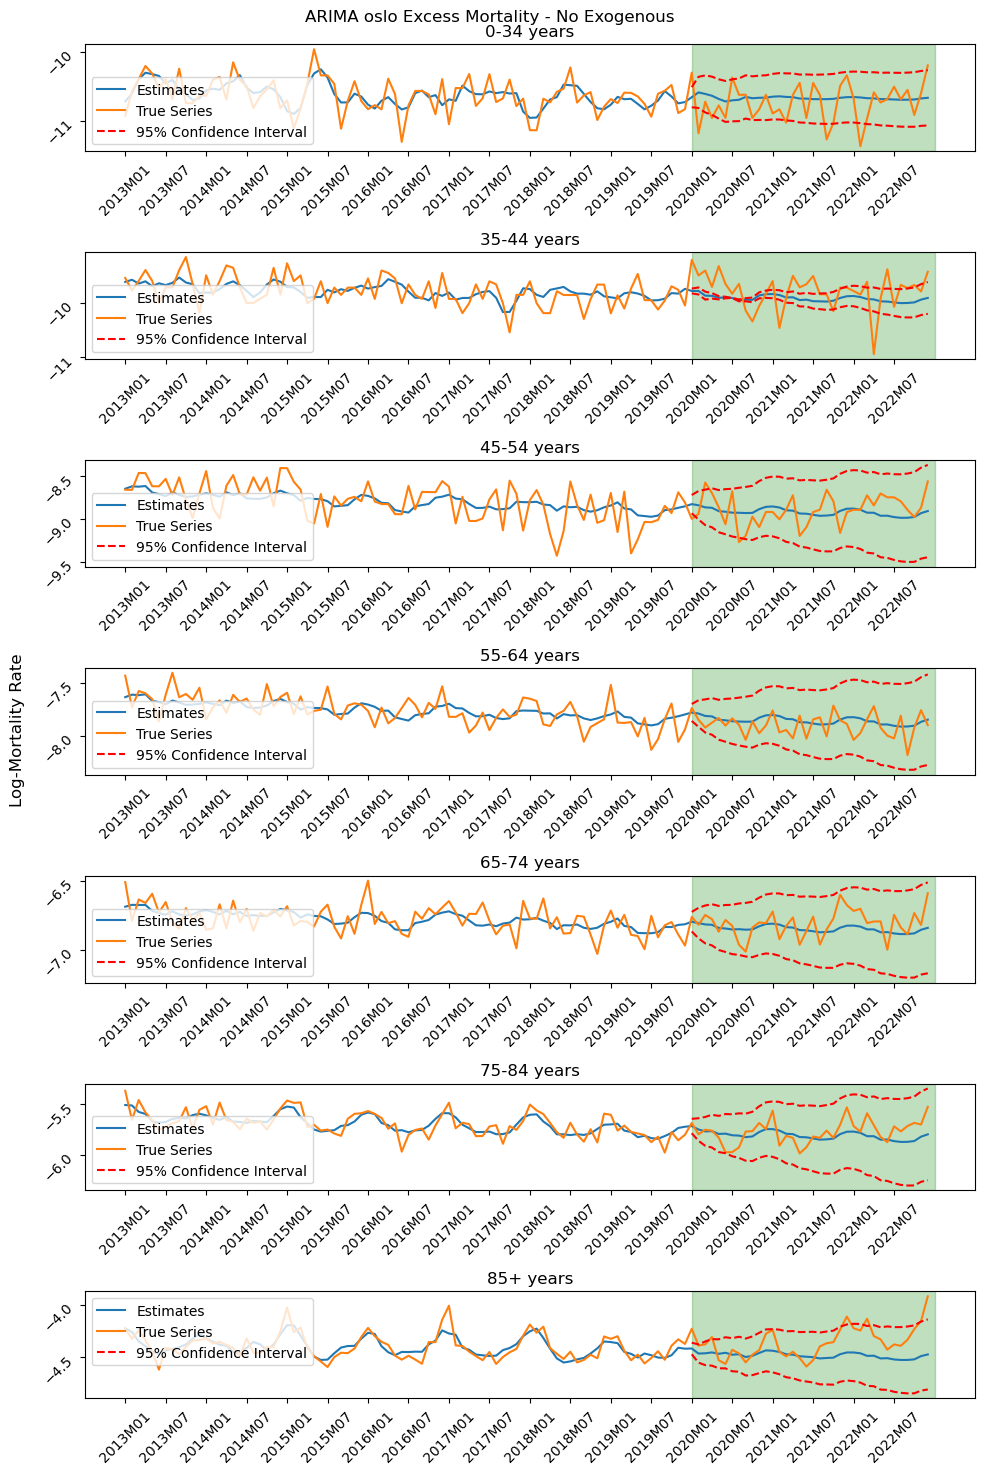

In [63]:
### Without Exogenous 2 common 4 regional 
### Without Exogenous
a_xi,B_xs,K_ts,b_xs,k_ts,country_re_est,regional_re_est,K_t_models,k_t_models_sarout,K_t_preds,k_t_preds,regional_predictions_saroutCOVID,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_,_ = full_model(all_nor_logmort_incCOVID,oslo_logmort_incCOVID, common_terms = 2,regional_terms = 1,prediction_period = 36,train_period = 84,country_deaths = nor_death_COVID, country_pop = nor_pop_COVID,region_deaths = oslo_death_COVID,region_pop = oslo_pop_COVID,re_est = False,smooth = True)  


regional_predictions_saroutCOVID = pd.DataFrame(regional_predictions_saroutCOVID)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_saroutCOVID.index = oslo_logmort_incCOVID.index
regional_predictions_saroutCOVID.columns = oslo_logmort_incCOVID.columns
regional_predictions_upconf.index = oslo_logmort_incCOVID.index
regional_predictions_upconf.columns = oslo_logmort_incCOVID.columns
regional_predictions_lowconf.index = oslo_logmort_incCOVID.index
regional_predictions_lowconf.columns = oslo_logmort_incCOVID.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_saroutCOVID.iloc[:,:84],oslo_logmort_incCOVID.iloc[:,:84])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_saroutCOVID.iloc[:,84:],oslo_logmort_incCOVID.iloc[:,84:])))

#oslo_pop_inCOVID = undo_person_days(pd.DataFrame(oslo_pop_inCOVID,columns = oslo_logmort_incCOVID.columns[-36:]))


exp_term = np.multiply(np.exp(a_xi+B_xs@K_t_preds[:,84:] + b_xs@k_t_preds[:,84:]),oslo_pop_inCOVID)
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(oslo_death_inCOVID,axis = 1)
print("\nPredicted number of deaths for COVID period " + str(pred_total_deaths))
print("Actual number of deaths for COVID period " + str(actual_total_deaths))
print("Actual deaths over predicted deaths " +str(actual_total_deaths/pred_total_deaths))
print("Total Excess Mortality (Actual - Predicted): " + str(np.sum(pred_total_deaths) - np.sum(actual_total_deaths)))
print("Excess Mortality Ratio (Actual/Predicted): " + str(np.sum(pred_total_deaths)/np.sum(actual_total_deaths)))


regional_predictions_saroutCOVID
error_SARIMAX_woutCOVID = MAPE(regional_predictions_saroutCOVID.iloc[:,84:],oslo_logmort_incCOVID.iloc[:,84:])
prediction_plots(regional_predictions_saroutCOVID,regional_predictions_upconf,regional_predictions_lowconf,36,oslo_logmort_incCOVID,suptitle = "ARIMA oslo Excess Mortality - No Exogenous")


In [81]:
print(str(K_t_models["model_0"].get_params()["order"]) + str(K_t_models["model_0"].get_params()["seasonal_order"]))
print(str(K_t_models["model_1"].get_params()["order"]) + str(K_t_models["model_1"].get_params()["seasonal_order"]))
print("-")
print(str(k_t_models_sarout["model_0"].get_params()["order"]) + str(k_t_models_sarout["model_0"].get_params()["seasonal_order"]))
print(str(k_t_models_sarout["model_1"].get_params()["order"]) + str(k_t_models_sarout["model_1"].get_params()["seasonal_order"]))
print(str(k_t_models_sarout["model_2"].get_params()["order"]) + str(k_t_models_sarout["model_2"].get_params()["seasonal_order"]))
print(str(k_t_models_sarout["model_3"].get_params()["order"]) + str(k_t_models_sarout["model_3"].get_params()["seasonal_order"]))



(1, 1, 1)(2, 0, 1, 12)
(2, 1, 0)(1, 0, 2, 12)
-
(0, 0, 0)(0, 0, 0, 12)
(0, 0, 1)(1, 0, 1, 12)
(3, 1, 2)(0, 0, 0, 12)
(0, 0, 0)(1, 0, 0, 12)


p_value k_t0 before re-estimation: 1.486974803091155e-11 

p_value k_t0 after re-estimation: 1.486974803091155e-11 

Model Error 9.676286552591916
Re_estimation error Each Age Group (MAPE): [1.36270281 1.72556176 1.5948997  1.15259241 1.05475096 1.03535847
 1.09414285]

 Prediction Error Each Age Group (MAPE)[2.07373394 2.83059729 1.84834497 1.09838792 1.11322252 1.56418945
 3.01948946]

Predicted number of deaths for COVID period [  701.   544.  1322.  3195.  6909. 11752. 16142.]
Actual number of deaths for COVID period [  705   602  1389  3035  6970 11623 17029]
Actual deaths over predicted deaths [1.00570613 1.10661765 1.05068079 0.94992175 1.00882906 0.98902314
 1.05494982]
Total Excess Mortality (Actual - Predicted): -788.0
Excess Mortality Ratio (Actual/Predicted): 0.9809445505767417


<Figure size 640x480 with 0 Axes>

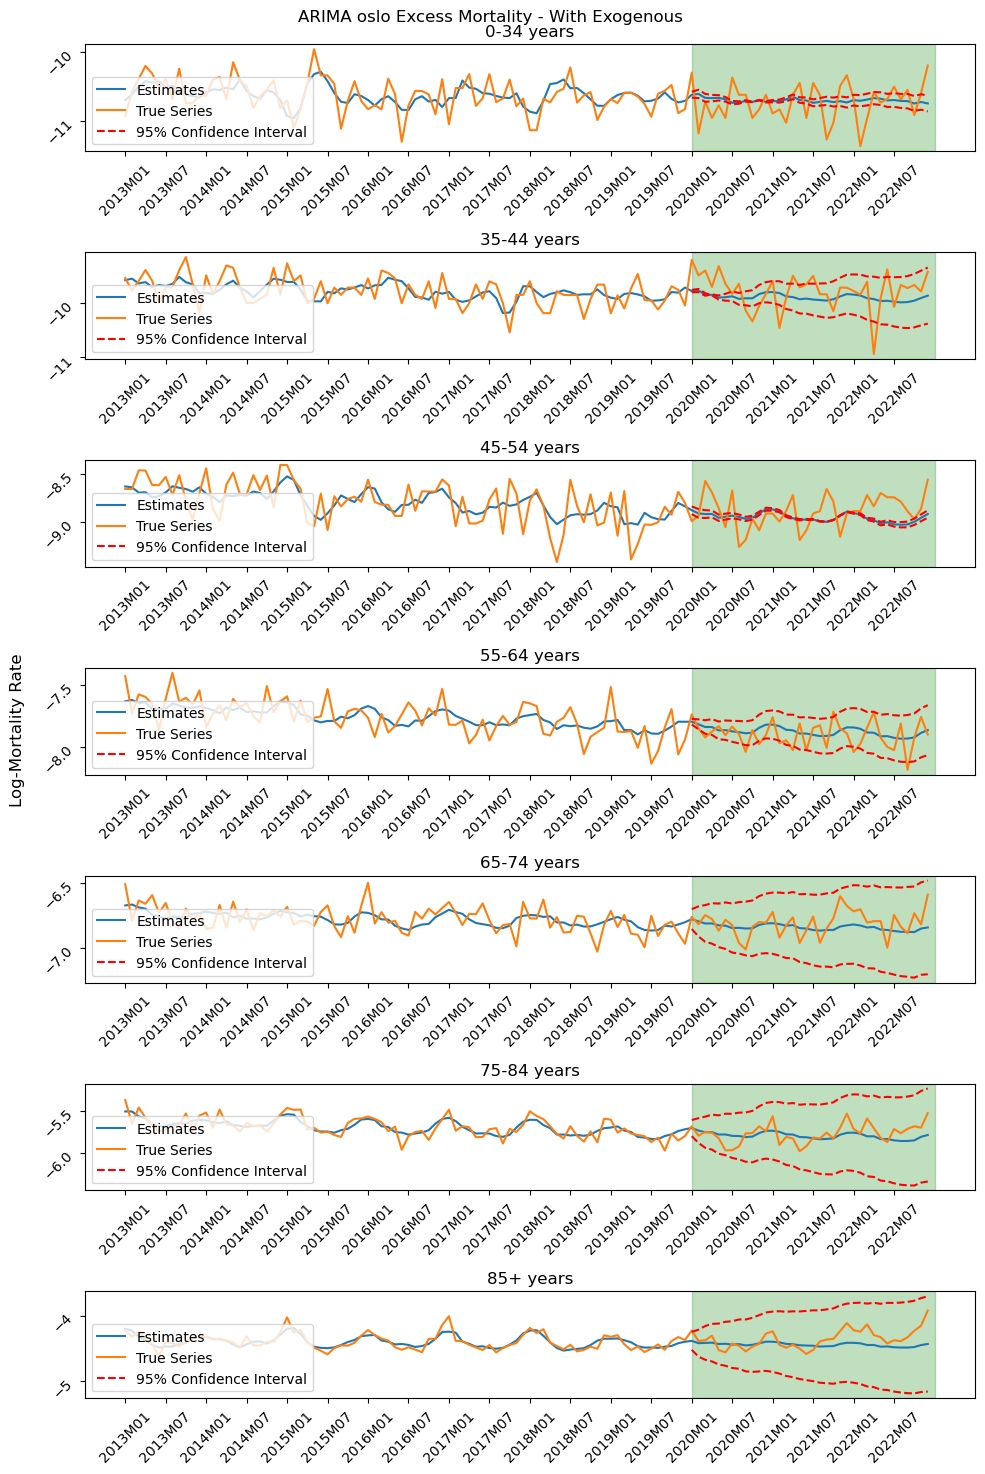

In [64]:
### With Exogenous
a_xi,B_xs,K_ts,b_xs,k_ts,country_re_est,regional_re_est,K_t_models,k_t_models_sarw,K_t_preds,k_t_preds,regional_predictions_sarwithCOVID,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_,_ = full_model(all_nor_logmort_incCOVID,oslo_logmort_incCOVID, common_terms = 3,regional_terms = 1,prediction_period = 36,train_period = 84,exogenous_train = exog_train_oslo_COVID,exogenous_test = exog_test_oslo_COVID,country_deaths = nor_death_COVID, country_pop = nor_pop_COVID,region_deaths = oslo_death_COVID,region_pop = oslo_pop_COVID,re_est = False,smooth = True)  


regional_predictions_sarwithCOVID = pd.DataFrame(regional_predictions_sarwithCOVID)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_sarwithCOVID.index = oslo_logmort_incCOVID.index
regional_predictions_sarwithCOVID.columns = oslo_logmort_incCOVID.columns
regional_predictions_upconf.index = oslo_logmort_incCOVID.index
regional_predictions_upconf.columns = oslo_logmort_incCOVID.columns
regional_predictions_lowconf.index = oslo_logmort_incCOVID.index
regional_predictions_lowconf.columns = oslo_logmort_incCOVID.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_sarwithCOVID.iloc[:,:84],oslo_logmort_incCOVID.iloc[:,:84])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_sarwithCOVID.iloc[:,84:],oslo_logmort_incCOVID.iloc[:,84:])))

#oslo_pop_inCOVID = undo_person_days(pd.DataFrame(oslo_pop_inCOVID,columns = oslo_logmort_incCOVID.columns[-36:]))


exp_term = np.multiply(np.exp(a_xi+B_xs@K_t_preds[:,84:] + b_xs@k_t_preds[:,84:]),oslo_pop_inCOVID)
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(oslo_death_inCOVID,axis = 1)
print("\nPredicted number of deaths for COVID period " + str(pred_total_deaths))
print("Actual number of deaths for COVID period " + str(actual_total_deaths))
print("Actual deaths over predicted deaths " +str(actual_total_deaths/pred_total_deaths))
print("Total Excess Mortality (Actual - Predicted): " + str(np.sum(pred_total_deaths) - np.sum(actual_total_deaths)))
print("Excess Mortality Ratio (Actual/Predicted): " + str(np.sum(pred_total_deaths)/np.sum(actual_total_deaths)))


error_SARIMAX_withCOVID = MAPE(regional_predictions_sarwithCOVID.iloc[:,84:],oslo_logmort_incCOVID.iloc[:,84:])
prediction_plots(regional_predictions_sarwithCOVID,regional_predictions_upconf,regional_predictions_lowconf,36,oslo_logmort_incCOVID,suptitle = "ARIMA oslo Excess Mortality - With Exogenous")



In [44]:
print(str(K_t_models["model_0"].get_params()["order"]) + str(K_t_models["model_0"].get_params()["seasonal_order"]))
print("-")
print(str(k_t_models_sarw["model_0"].get_params()["order"]) + str(k_t_models_sarw["model_0"].get_params()["seasonal_order"]))
print(str(k_t_models_sarw["model_1"].get_params()["order"]) + str(k_t_models_sarw["model_1"].get_params()["seasonal_order"]))
print(str(k_t_models_sarw["model_2"].get_params()["order"]) + str(k_t_models_sarw["model_2"].get_params()["seasonal_order"]))



(1, 0, 0)(1, 0, 1, 12)
-
(0, 1, 1)(0, 0, 1, 12)
(0, 1, 1)(0, 0, 0, 12)
(0, 1, 1)(1, 0, 0, 12)


test_errors[ 2.34043207 10.46915728  6.11985796  3.88100134  3.81059037  6.43733263
  8.32656959]

Predicted number of deaths for COVID period [nan nan nan nan nan nan nan]
Actual number of deaths for COVID period [  705   602  1389  3035  6970 11623 17029]
Actual deaths over predicted deaths [nan nan nan nan nan nan nan]
Total Excess Mortality (Actual - Predicted): nan
Excess Mortality Ratio (Actual/Predicted): nan


<Figure size 640x480 with 0 Axes>

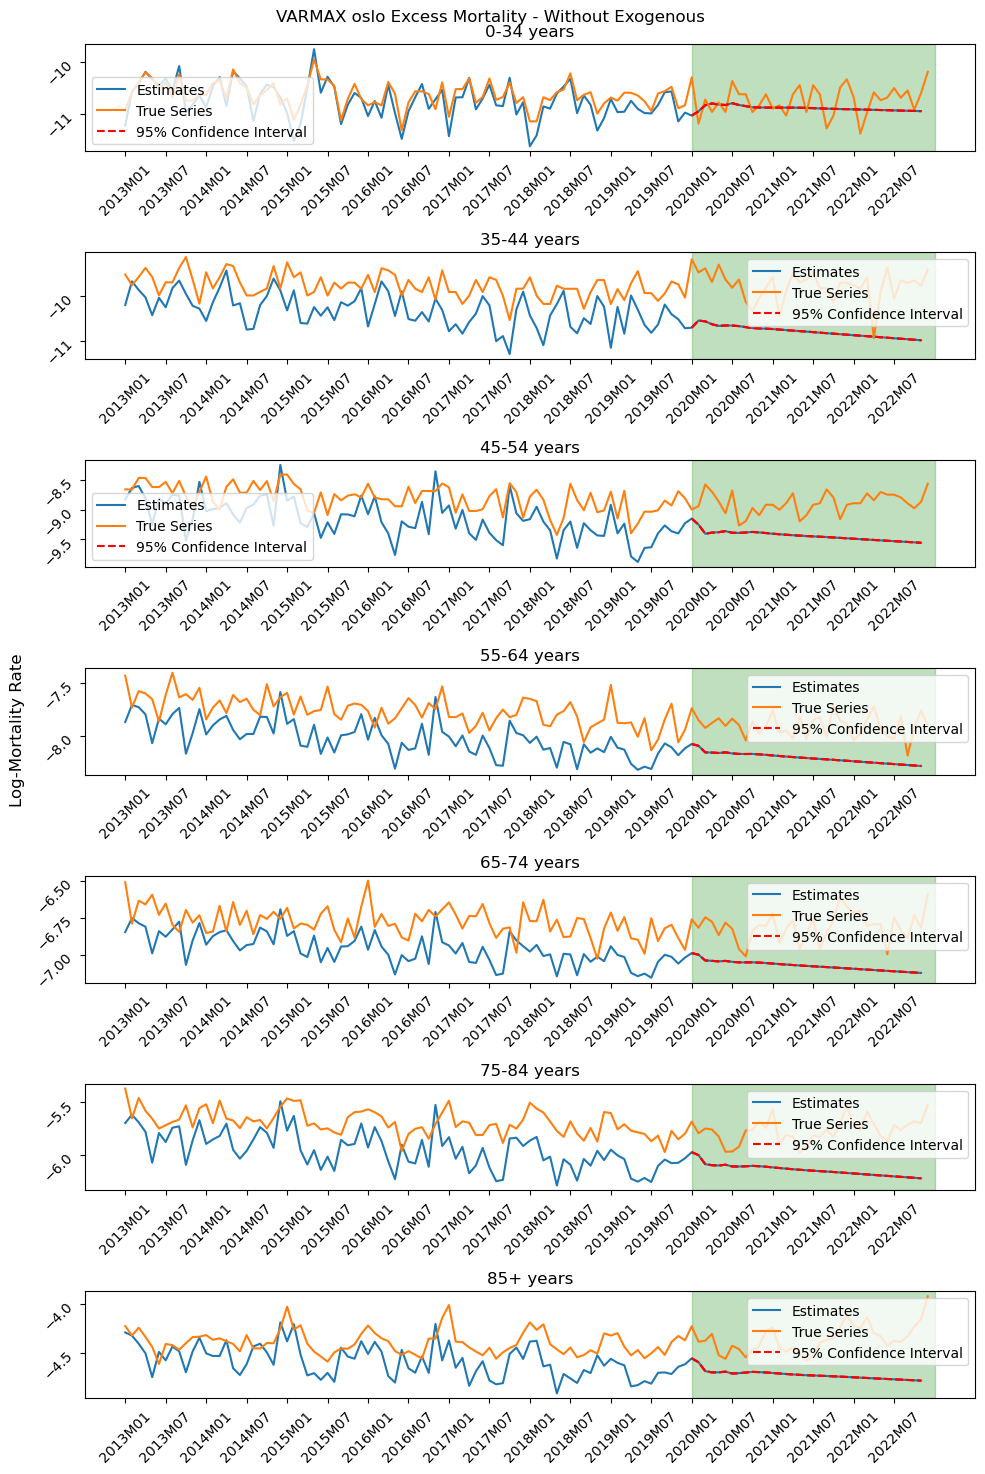

In [65]:
all_k_t, K_ts,k_ts,B_xs,b_xs,a_xi,all_k_preds,predictions_VAR_woutCOVID,predictions_lowconf,predictions_upconf,model_VAR_woutCOVID,aic,error_VAR_woutCOVID,_,_ = VARMAX_model(all_nor_logmort_incCOVID,oslo_logmort_incCOVID, common_terms = 3,regional_terms = 3,prediction_period = 36,train_period = 84,AR= 3,MA = 2, country_deaths = nor_death_COVID,country_pop = nor_pop_COVID,region_deaths = oslo_death_COVID,region_pop = oslo_pop_COVID,re_est = False)


print("test_errors" + str(error_VAR_woutCOVID))

K_t_preds = np.array(all_k_preds.iloc[84:,:3].fillna(method="ffill")).transpose() # change column number to match number of common terms
k_t_preds = np.array(all_k_preds.iloc[84:,3:]).transpose()

#oslo_pop_inCOVID = undo_person_days(pd.DataFrame(oslo_pop_inCOVID,columns = oslo_logmort_incCOVID.columns[-36:]))

exp_term = np.multiply(np.exp(a_xi+B_xs@K_t_preds + b_xs@k_t_preds),oslo_pop_inCOVID)
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(oslo_death_inCOVID,axis = 1)
print("\nPredicted number of deaths for COVID period " + str(pred_total_deaths))
print("Actual number of deaths for COVID period " + str(actual_total_deaths))
print("Actual deaths over predicted deaths " +str(actual_total_deaths/pred_total_deaths))
print("Total Excess Mortality (Actual - Predicted): " + str(np.sum(pred_total_deaths) - np.sum(actual_total_deaths)))
print("Excess Mortality Ratio (Actual/Predicted): " + str(np.sum(pred_total_deaths)/np.sum(actual_total_deaths)))


prediction_plots(predictions_VAR_woutCOVID,predictions_VAR_woutCOVID,predictions_VAR_woutCOVID,36,oslo_logmort_incCOVID,suptitle = "VARMAX oslo Excess Mortality - Without Exogenous")



test_errors[ 2.92633489  5.72671704  6.49141158  4.09196484  3.63182781  7.55724884
 10.86743778]

Predicted number of deaths for COVID period [  903.   442.  1071.  2702.  6098.  9346. 12648.]
Actual number of deaths for COVID period [  705   602  1389  3035  6970 11623 17029]
Actual deaths over predicted deaths [0.7807309  1.36199095 1.29691877 1.12324204 1.1429977  1.24363364
 1.34637887]


<Figure size 640x480 with 0 Axes>

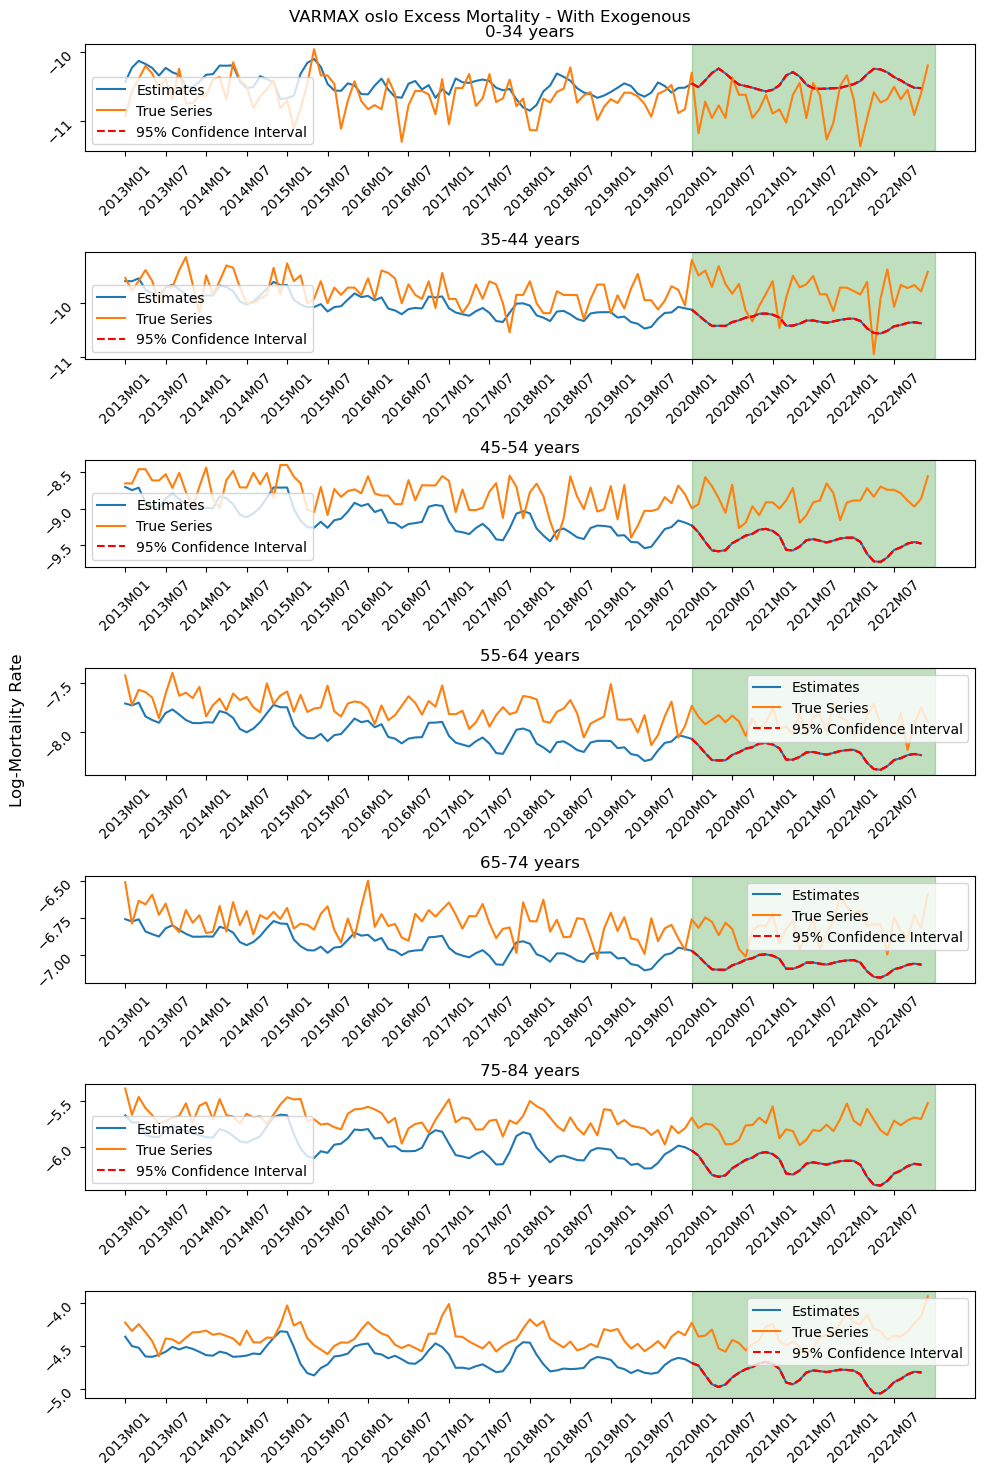

In [66]:
#exog_train_oslo_COVID = lag_exogenous(exog_train_oslo_COVID,numlags = 4)
#exog_test_oslo_COVID = lag_exogenous(exog_test_oslo_COVID,numlags = 4)
all_k_t, K_ts,k_ts,B_xs,b_xs,a_xi,all_k_preds,predictions_VAR_withCOVID,predictions_lowconf,predictions_upconf,model_VAR_withCOVID,aic,error_VAR_withCOVID,_,_ = VARMAX_model(all_nor_logmort_incCOVID,oslo_logmort_incCOVID, common_terms = 1,regional_terms = 2,prediction_period = 36,train_period = 84,AR= 4,MA = 4,exogenous_train = exog_train_oslo_COVID,exogenous_test = exog_test_oslo_COVID,country_deaths = nor_death_COVID, country_pop = nor_pop_COVID,region_deaths = oslo_death_COVID,region_pop = oslo_pop_COVID,re_est = False,smooth = True)


print("test_errors" + str(error_VAR_withCOVID))

K_t_preds = np.array(all_k_preds.iloc[84:,:1].fillna(method="ffill")).transpose()
k_t_preds = np.array(all_k_preds.iloc[84:,1:].fillna(method = "ffill")).transpose()

#oslo_pop_inCOVID = undo_person_days(pd.DataFrame(oslo_pop_inCOVID,columns = oslo_logmort_incCOVID.columns[-36:]))


exp_term = np.multiply(np.exp(a_xi+B_xs@K_t_preds + b_xs@k_t_preds),oslo_pop_inCOVID)
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(oslo_death_inCOVID,axis = 1)
print("\nPredicted number of deaths for COVID period " + str(pred_total_deaths))
print("Actual number of deaths for COVID period " + str(actual_total_deaths))
print("Actual deaths over predicted deaths " +str(actual_total_deaths/pred_total_deaths))

prediction_plots(predictions_VAR_withCOVID,predictions_VAR_withCOVID,predictions_VAR_withCOVID,36,oslo_logmort_incCOVID,suptitle = "VARMAX oslo Excess Mortality - With Exogenous")


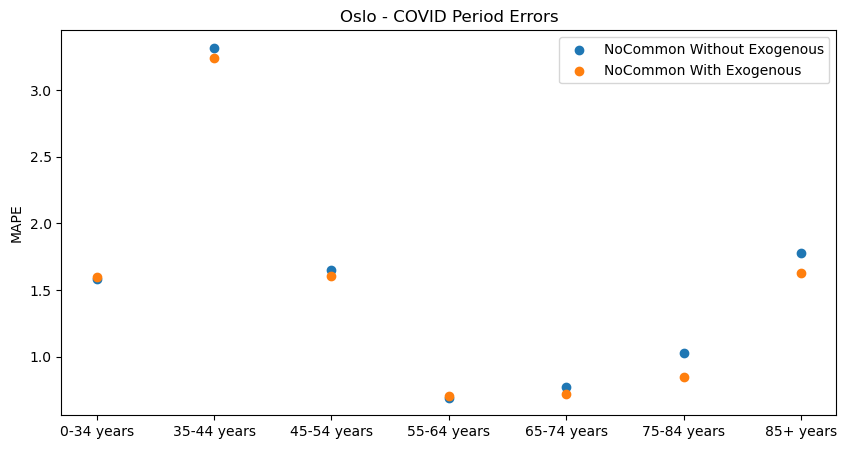

In [83]:
test_errors = np.vstack((error_SARIMAX_woutCOVID,error_SARIMAX_withCOVID,error_VAR_woutCOVID,error_VAR_withCOVID,error_NoCom_woutCOVID,error_NoCom_withCOVID))
oslo = test_errors

age_groups = oslo_logmort.index
plt.figure(figsize = (10,5))
# plt.scatter(age_groups,oslo[0,:],label = "SARIMAX Without Exogenous")
# plt.scatter(age_groups,oslo[1,:],label = "SARIMAX With Exogenous")
# plt.scatter(age_groups,oslo[2,:],label = "VARMAX Without Exogenous")
# plt.scatter(age_groups,oslo[3,:],label = "VARMAX With Exogenous")
plt.scatter(age_groups,oslo[4,:],label = "NoCommon Without Exogenous")
plt.scatter(age_groups,oslo[5,:],label = "NoCommon With Exogenous")
plt.legend();
plt.ylabel("MAPE")
plt.title("Oslo - COVID Period Errors");

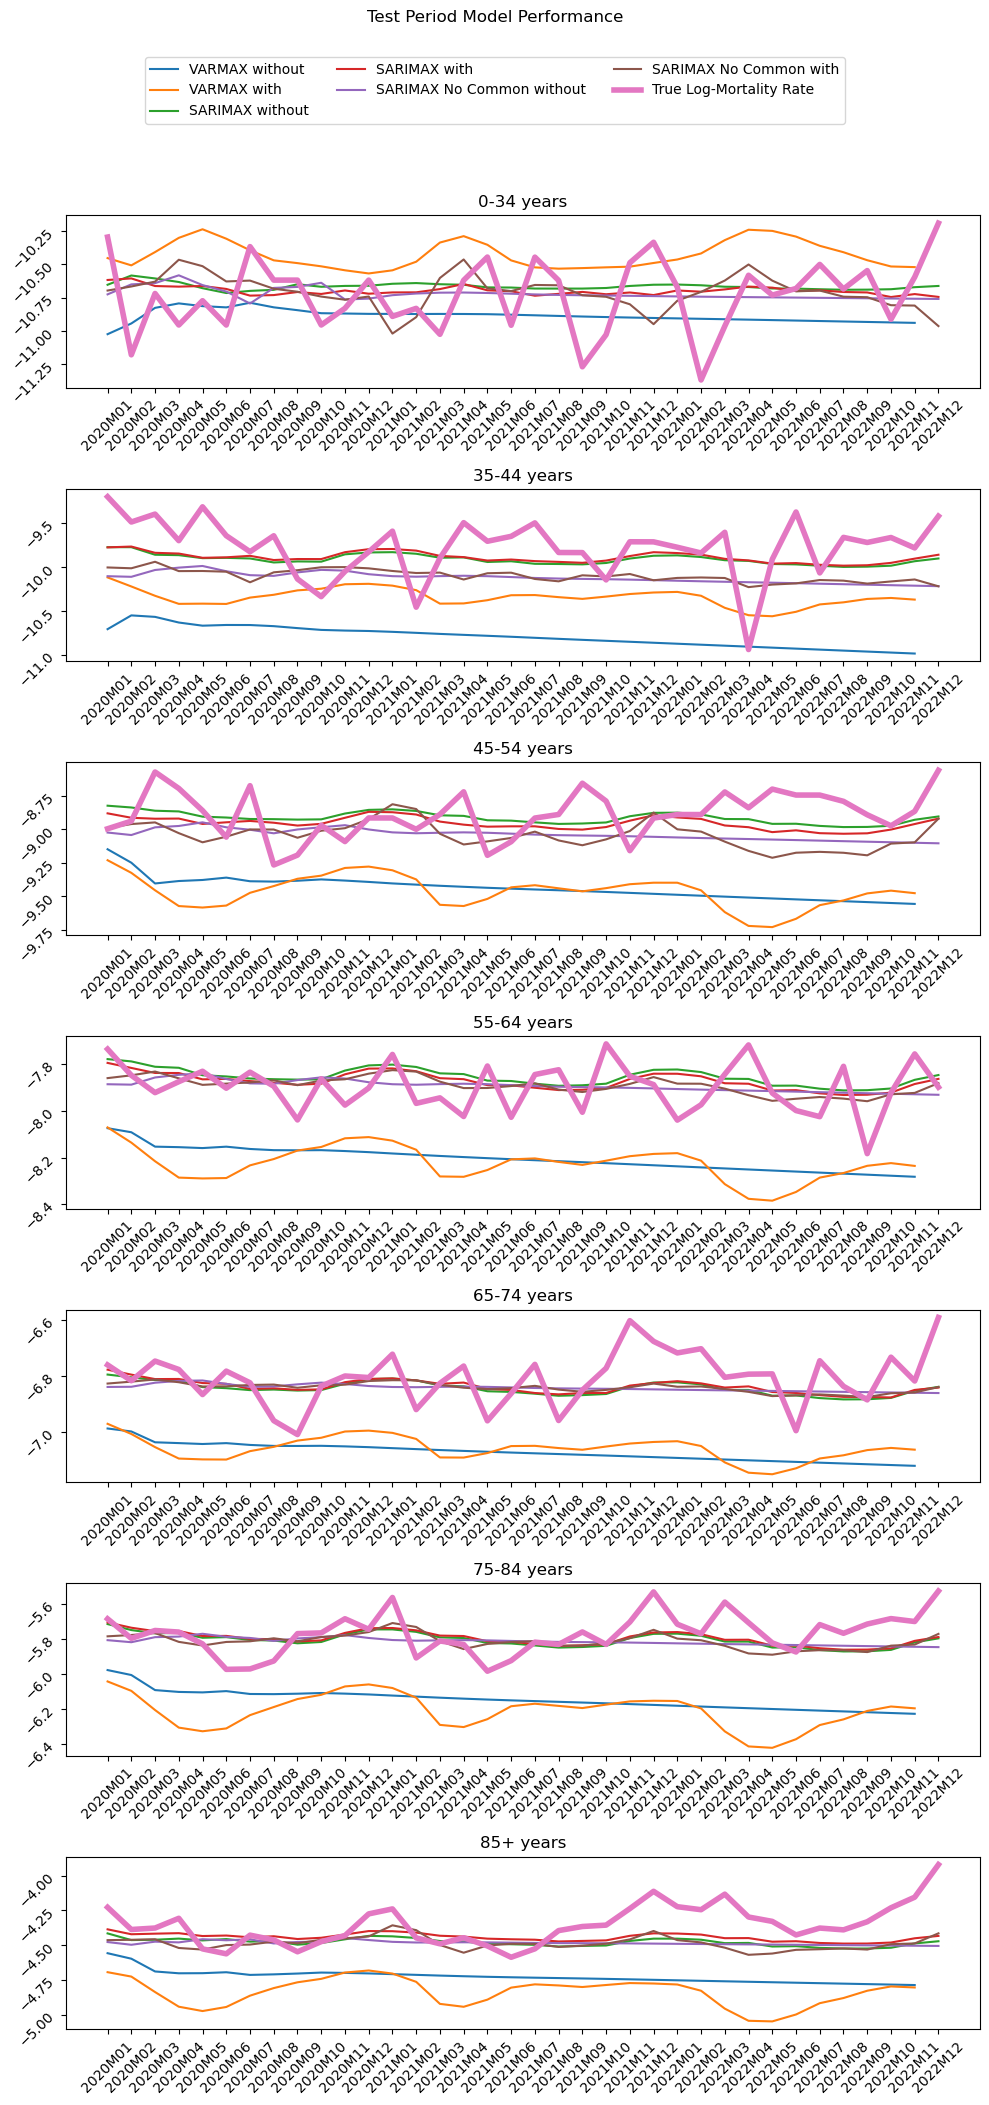

In [68]:
predictions_VAR_withCOVID = pd.DataFrame(predictions_VAR_withCOVID)
predictions_VAR_withCOVID.index = oslo_logmort_incCOVID.index
predictions_VAR_withCOVID.columns = oslo_logmort_incCOVID.columns

predictions_VAR_woutCOVID = pd.DataFrame(predictions_VAR_woutCOVID)
predictions_VAR_woutCOVID.index = oslo_logmort_incCOVID.index
predictions_VAR_woutCOVID.columns = oslo_logmort_incCOVID.columns


age_groups = oslo_logmort.index
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 20))

# Store lines and labels to create a single legend
lines = []
labels = []

for row in range(7):
    age = age_groups[row]
    axes[row].set_title(age)
    
    line1, = axes[row].plot(predictions_VAR_woutCOVID.iloc[row, 84:], label="VARMAX without")
    line2, = axes[row].plot(predictions_VAR_withCOVID.iloc[row, 84:], label="VARMAX with")
    line3, = axes[row].plot(regional_predictions_saroutCOVID.iloc[row, 84:], label="SARIMAX without")
    line4, = axes[row].plot(regional_predictions_sarwithCOVID.iloc[row, 84:], label="SARIMAX with")
    line5, = axes[row].plot(regional_predictions_nocommoutCOVID.iloc[row, 84:], label="SARIMAX No Common without")
    line6, = axes[row].plot(regional_predictions_nocommwithCOVID.iloc[row, 84:], label="SARIMAX No Common with")
    line7, = axes[row].plot(oslo_logmort_incCOVID.iloc[row, 84:], label="True Log-Mortality Rate", linewidth=4)
    
    axes[row].tick_params(rotation=45)
    
    # Collect lines and labels for the legend
    if row == 0:
        lines.extend([line1, line2, line3, line4, line5, line6, line7])
        labels.extend([line.get_label() for line in lines])

# Create a single legend
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=3)
plt.suptitle("Test Period Model Performance", y=1.05)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Note: year 7 is only half an epiyear!  + First 6 months disregarded
Note: year 8 is only half an epiyear!  + First 6 months disregarded


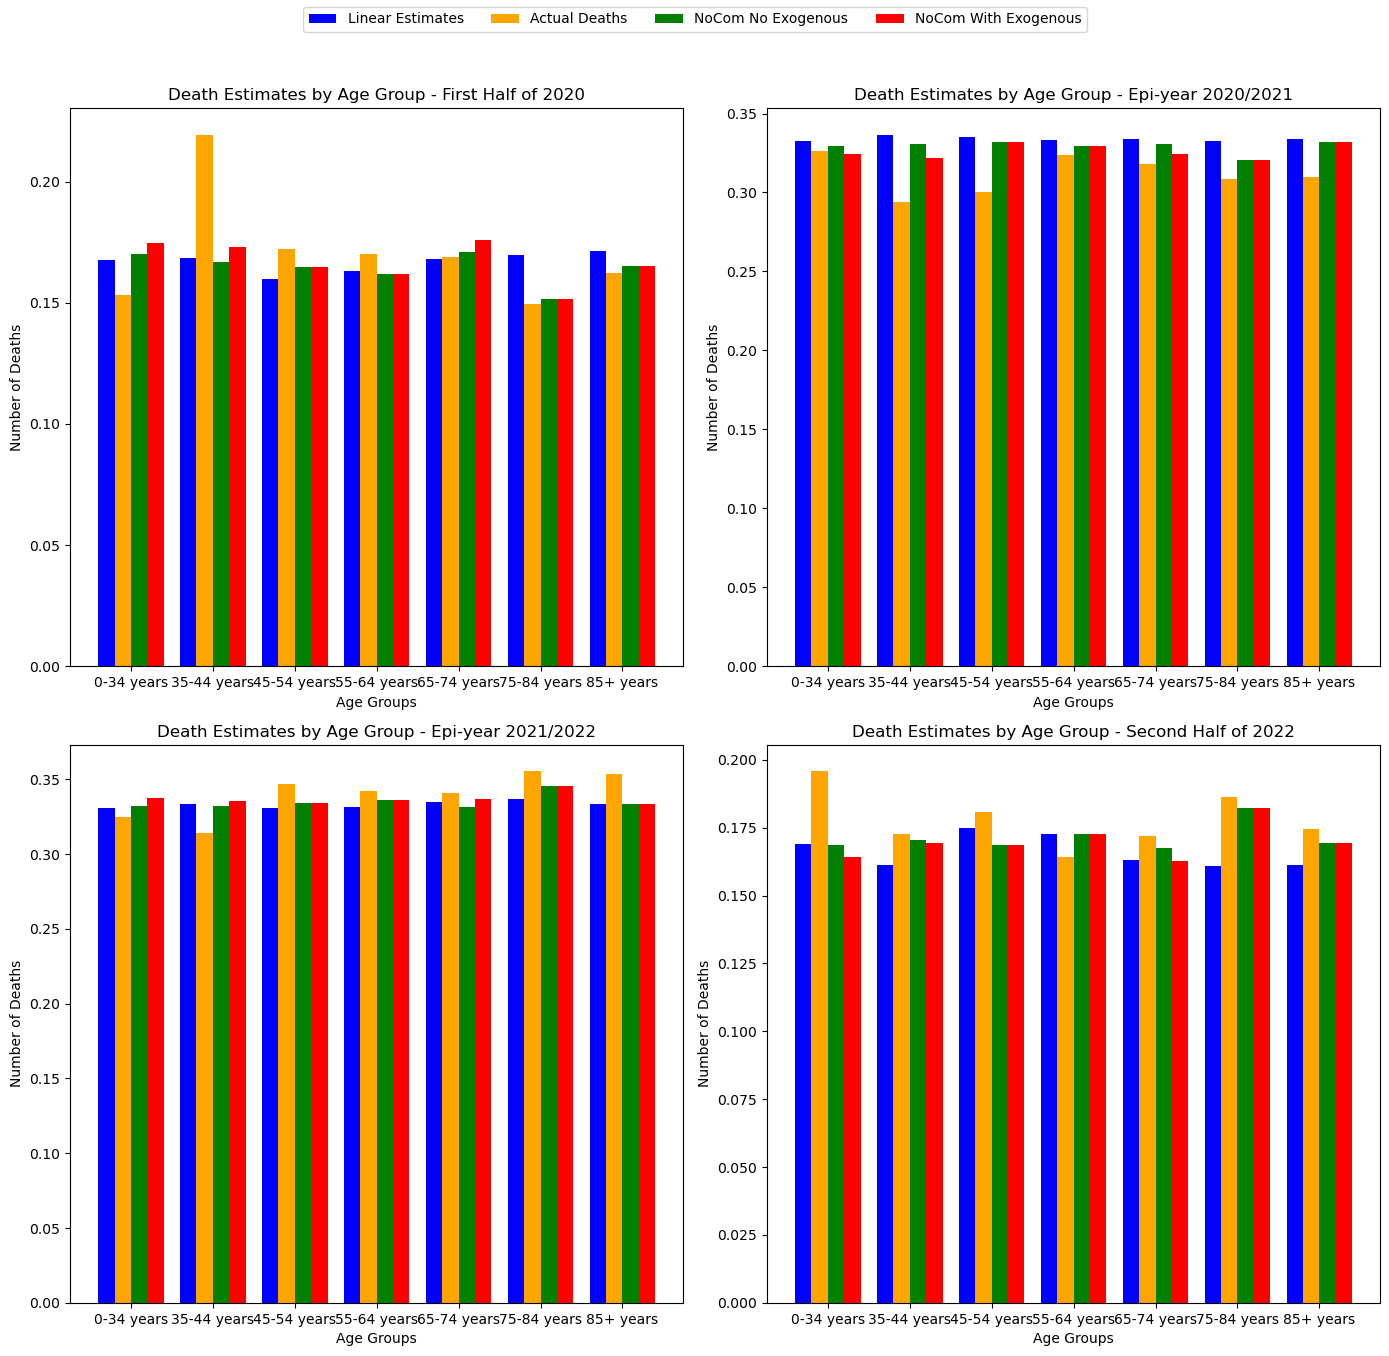

In [85]:
### Compile predictions for excess mortality for epidemic years
lin_ests_20 = np.round(est_half2_epiyear(oslo_death_COVID),0) #estimate for first 6 moths of 2020 ie. second half epi-year 19/20

#Use 2019/20 epi-year in estimate for epi-year 2020/21?  
lin_ests_20_21 = np.reshape(epi_year_lin_ests(pd.DataFrame(oslo_death_full.iloc[:,:96])),(7,))
lin_ests_21_22 = np.reshape(epi_year_lin_ests(pd.DataFrame(oslo_death_full.iloc[:,:108])),(7,))

#estimate for last 6 months of 2022 ie. first half epi-year 19/20
lin_ests_22 = np.round(est_half1_epiyear(oslo_death_COVID),0) #estimate for first 6 moths of 2020 ie. second half epi-year 19/20

# only first half of 2020, second half of epi-year 19/20
oslo_actual_deaths_20 = oslo_death_full.iloc[:,84:90].sum(axis = 1) 
oslo_actual_deaths_20_21 = epi_year(oslo_death_full.iloc[:,84:])["year_0"].sum(axis = 1)
oslo_actual_deaths_21_22 = epi_year(oslo_death_full.iloc[:,84:])["year_1"].sum(axis = 1)
oslo_actual_deaths_22 = epi_year(oslo_death_full.iloc[:,84:])["year_2"].sum(axis = 1) #only second half of 2022 


age_groups = oslo_logmort_full.index
r = np.arange(len(age_groups))
width = 0.2  # Adjusting width to fit four bars

fig, axes = plt.subplots(2, 2, figsize=(14, 14))  # Creating a 2x2 grid of subplots

# Labels for the legends
labels = ["Linear Estimates", "Actual Deaths", "NoCom No Exogenous", "NoCom With Exogenous"]

# Defining data sets for each subplot
data_sets = [
    (lin_ests_20, oslo_actual_deaths_20, oslo_NoCom_NoExog_deaths_20, oslo_NoCom_WithExog_deaths_20),
    (lin_ests_20_21, oslo_actual_deaths_20_21, oslo_NoCom_NoExog_deaths_20_21, oslo_NoCom_WithExog_deaths_20_21),
    (lin_ests_21_22, oslo_actual_deaths_21_22, oslo_NoCom_NoExog_deaths_21_22, oslo_NoCom_WithExog_deaths_21_22),
    (lin_ests_22, oslo_actual_deaths_22, oslo_NoCom_NoExog_deaths_22, oslo_NoCom_WithExog_deaths_22)
]
data_sets = data_sets/np.sum(data_sets,axis = 0)

titles = [
    'Death Estimates by Age Group - First Half of 2020',
    'Death Estimates by Age Group - Epi-year 2020/2021',
    'Death Estimates by Age Group - Epi-year 2021/2022',
    'Death Estimates by Age Group - Second Half of 2022'
]

for ax, data, title in zip(axes.flatten(), data_sets, titles):
    lin_est, actual_death, NoCom_noexog, NoCom_withexog = data
    ax.bar(r - 1.5*width, lin_est, width=width, align="center", color="blue", label=labels[0])
    ax.bar(r - 0.5*width, actual_death, width=width, align="center", color="orange", label=labels[1])
    ax.bar(r + 0.5*width, NoCom_noexog, width=width, align="center", color="green", label=labels[2])
    ax.bar(r + 1.5*width, NoCom_withexog, width=width, align="center", color="red", label=labels[3])
    ax.set_xticks(r)
    ax.set_xticklabels(age_groups)
    ax.set_xlabel('Age Groups')
    ax.set_ylabel('Number of Deaths')
    ax.set_title(title)

# Adding a single legend for the whole figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the legend
plt.show()






In [48]:
data_sets

array([[[0.16502632, 0.16629246, 0.15672821, 0.16030824, 0.16532378,
         0.16757202, 0.16913831],
        [0.15319149, 0.2192691 , 0.17206623, 0.17001647, 0.16886657,
         0.1495311 , 0.1621939 ],
        [0.1722408 , 0.18372703, 0.18031279, 0.17107584, 0.17144207,
         0.16236811, 0.17575282],
        [0.192     , 0.17948718, 0.17260274, 0.16998951, 0.17178202,
         0.15961894, 0.17114932]],

       [[0.33188373, 0.33635113, 0.33464241, 0.33217561, 0.33301963,
         0.331195  , 0.33264432],
        [0.32624113, 0.29401993, 0.30021598, 0.32388797, 0.317934  ,
         0.30878431, 0.30958952],
        [0.33277592, 0.34383202, 0.33946642, 0.335097  , 0.33705919,
         0.33010942, 0.34258599],
        [0.3296    , 0.34102564, 0.34703196, 0.33753061, 0.33777012,
         0.3330417 , 0.34629379]],

       [[0.33646143, 0.33917578, 0.33673393, 0.33733109, 0.34138638,
         0.34466934, 0.33999361],
        [0.3248227 , 0.31395349, 0.34701224, 0.34200988, 0.34117647,


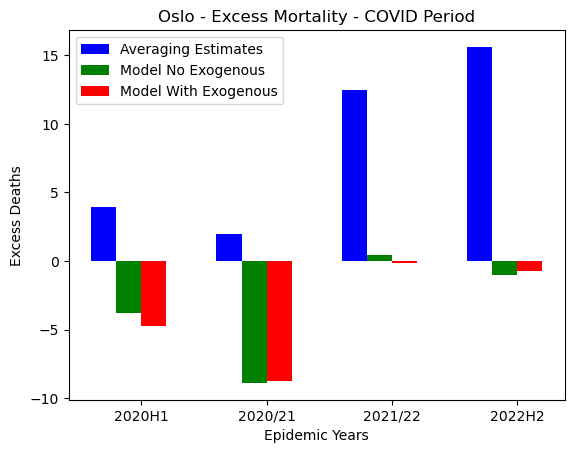

In [87]:


oslo_actual_deaths_total_20 = np.sum(oslo_actual_deaths_20)
lin_ests_excess_20 = (oslo_actual_deaths_total_20 - np.sum(lin_ests_20))/oslo_actual_deaths_total_20 *100
oslo_NoCom_NoExog_excess_total_20 = (oslo_actual_deaths_total_20 - np.sum(oslo_NoCom_NoExog_deaths_20))/oslo_actual_deaths_total_20 *100
oslo_NoCom_WithExog_excess_total_20 = (oslo_actual_deaths_total_20 - np.sum(oslo_NoCom_WithExog_deaths_20))/oslo_actual_deaths_total_20 *100

oslo_actual_deaths_total_20_21 = np.sum(oslo_actual_deaths_20_21)
lin_ests_excess_20_21 = (oslo_actual_deaths_total_20_21 - np.sum(lin_ests_20_21))/oslo_actual_deaths_total_20_21 *100
oslo_NoCom_NoExog_excess_total_20_21 = (oslo_actual_deaths_total_20_21 - np.sum(oslo_NoCom_NoExog_deaths_20_21))/oslo_actual_deaths_total_20_21 *100
oslo_NoCom_WithExog_excess_total_20_21 = (oslo_actual_deaths_total_20_21 - np.sum(oslo_NoCom_WithExog_deaths_20_21))/oslo_actual_deaths_total_20_21 *100

oslo_actual_deaths_total_21_22 = np.sum(oslo_actual_deaths_21_22) 
lin_ests_excess_21_22 = (oslo_actual_deaths_total_21_22 - np.sum(lin_ests_21_22))/oslo_actual_deaths_total_21_22 *100
oslo_NoCom_NoExog_excess_total_21_22 = (oslo_actual_deaths_total_21_22 - np.sum(oslo_NoCom_NoExog_deaths_21_22))/oslo_actual_deaths_total_21_22 *100
oslo_NoCom_WithExog_excess_total_21_22 = (oslo_actual_deaths_total_21_22 - np.sum(oslo_NoCom_WithExog_deaths_21_22))/oslo_actual_deaths_total_21_22 *100

oslo_actual_deaths_total_22 = np.sum(oslo_actual_deaths_22) 
lin_ests_excess_22 = (oslo_actual_deaths_total_22 - np.sum(lin_ests_22))/oslo_actual_deaths_total_22 *100
oslo_NoCom_NoExog_excess_total_22 = (oslo_actual_deaths_total_22 - np.sum(oslo_NoCom_NoExog_deaths_22))/oslo_actual_deaths_total_22 *100
oslo_NoCom_WithExog_excess_total_22 = (oslo_actual_deaths_total_22 - np.sum(oslo_NoCom_WithExog_deaths_22))/oslo_actual_deaths_total_22 *100


# Assuming oslo_logmort_full, lin_ests_20, oslo_actual_deaths_20, oslo_NoCom_NoExog_deaths_20, and oslo_NoCom_WithExog_deaths_20 are defined
# oslo_logmort_full.index should be a list or an array of age groups

years = ["2020H1", "2020/21","2021/22", "2022H2"]
r = np.arange(len(years))
width = 0.2  # Adjusting width to fit four bars

# Labels for the legends
labels = ["Averaging Estimates", "Model No Exogenous", "Model With Exogenous","_nolegend_"]

plt.bar(r[0] - 1.5*width, lin_ests_excess_20, width=0.2, align="center", color="blue", label=labels[0])
plt.bar(r[0] - 0.5*width, oslo_NoCom_NoExog_excess_total_20, width=0.2, align="center", color="green", label=labels[1])
plt.bar(r[0] + 0.5*width, oslo_NoCom_WithExog_excess_total_20, width=0.2, align="center", color="red", label=labels[2])
#plt.bar(r[0] + 1.5*width, oslo_actual_deaths_total_20, width=0.2, align="center", color="orange", label=labels[0])

plt.bar(r[1] - 1.5*width, lin_ests_excess_20_21, width=0.2, align="center", color="blue", label=labels[3])
plt.bar(r[1] - 0.5*width, oslo_NoCom_NoExog_excess_total_20_21, width=0.2, align="center", color="green", label=labels[3])
plt.bar(r[1] + 0.5*width, oslo_NoCom_WithExog_excess_total_20_21, width=0.2, align="center", color="red", label=labels[3])
#plt.bar(r[1] + 1.5*width, oslo_actual_deaths_total_20_21, width=0.2, align="center", color="orange", label=labels[0])

plt.bar(r[2] - 1.5*width, lin_ests_excess_21_22, width=0.2, align="center", color="blue", label=labels[3])
plt.bar(r[2] - 0.5*width, oslo_NoCom_NoExog_excess_total_21_22, width=0.2, align="center", color="green", label=labels[3])
plt.bar(r[2] + 0.5*width, oslo_NoCom_WithExog_excess_total_21_22, width=0.2, align="center", color="red", label=labels[3])

plt.bar(r[3] - 1.5*width, lin_ests_excess_22, width=0.2, align="center", color="blue", label=labels[3])
plt.bar(r[3] - 0.5*width, oslo_NoCom_NoExog_excess_total_22, width=0.2, align="center", color="green", label=labels[3])
plt.bar(r[3] + 0.5*width, oslo_NoCom_WithExog_excess_total_22, width=0.2, align="center", color="red", label=labels[3])

plt.xticks(r, years)
plt.legend()
plt.xlabel('Epidemic Years')
plt.ylabel('Excess Deaths')
plt.title('Oslo - Excess Mortality - COVID Period');
# plt.show()

